<img src="images/cads-logo.png" style="height: 100px;" align=left> 

# DA Capstone

1. Create a team (2-3 people)
2. Perform the following:
    1. **Data Wrangling - Cleaning & Merging**: Check and handle the existance of missing values, the type of variables, or integrity of data  ####
    2. **Exploratory Data Analysis**: Analyze data to summarize their main characteristics   ###
    3. **Feature Engineering**: Make new features or change the current features   
    4. **Feature Selection**: Choose the best features  
    5. **Queries** Use SQL to query the data

## Submission Guideline
The output expected at the end of this hackathon is:
1. One **Jupyter notebook** containing all analysis performed using Python.
2. One **PowerPoint** presentation containing the analysis results. Each group will be allocated 15-20 minutes (inclusive of Q&A) to present their analysis results to the class.
3. One **Final Dataset** - in csv format

One zip file per group is to be uploaded on GDrive **by 2:30 pm of the last day**, including the jupyter notebook(s) and the powerpoint presentation indicating the names of all group members.


## Presentation Guideline


**Note(s):**
1. Only **one submission** is required per group.
2. Include full details in your notebook and **report only important results** in your presentation.
3. Please only use Jupyter notebook (pandas) to clean the data (Do not clean manually using Excel)

## Objective
**Perform Exploratory Data Analysis for the Dataset Provided uisng Python, then load the data into a database using pandas and Solve the queries. The dataset is about customer purchasing history, and focused on determining potential customers.**

You have been provided with information such as customers spending for last sevral years, the amount of money spent,Number of inactive months and so on

## Data description
- Below is the description of each feature available in the dataset
<img src="images/MicrosoftTeams-image.png" style="height: 700px">

##  Import necessary Packages

In [1]:
# Importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#Your Code Here

### Load the Data into Pandas Dataframe

In [2]:
# Load the data into data dataframe
#Your Code Here
data = pd.read_csv('../Capstone/data.csv')

In [3]:
# View first 5 rows of the dataframe
#Your Code Here
data.head()

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,9946,$5.00,2,17,2,4,$0.00,$7.50,$7.76,...,73,3,12,16,A,0,71.0,F,H,"$65,957.00"
1,1,87939,$30.00,1,7,0,3,$25.00,$25.00,$13.00,...,55,6,6,22,A,1,7.0,M,U,$0.00
2,0,88003,NaN,5,12,3,5,$15.00,$15.00,$11.25,...,53,6,17,22,S,1,79.0,F,U,$0.00
3,1,188721,$20.00,1,11,0,3,$20.00,$20.00,$12.45,...,71,8,8,33,A,0,73.0,F,U,"$76,293.00"
4,1,88056,$5.00,3,15,2,7,$3.00,$4.33,$3.80,...,63,6,12,24,S,1,68.0,F,H,"$113,663.00"


In [4]:
# View your data
#Your Code Here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        4469 non-null   int64  
 1   C_ID                      4469 non-null   int64  
 2   Cust_Last_Purchase        2149 non-null   object 
 3   Pur_3_years               4469 non-null   int64  
 4   Pur_5_years               4469 non-null   int64  
 5   Pur_3_years_Indirect      4469 non-null   int64  
 6   Pur_5_years_Indirect      4469 non-null   int64  
 7   Pur_latest                4469 non-null   object 
 8   Pur_3_years_Avg           4469 non-null   object 
 9   Pur_5_years_Avg           4469 non-null   object 
 10  Pur_3_years_Avg_Indirect  3642 non-null   object 
 11  InAct_Last                4469 non-null   int64  
 12  InAct_First               4469 non-null   int64  
 13  Ad_Res_1_year             4469 non-null   int64  
 14  Ad_Res_3

# <font color=green>Data Cleaning<font>
Checking the existance of missing values, the type of variables, or integrity of data.

### How big is the dataset? (number of rows, features and total datapoints)

In [5]:
#Your Code Here
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns or features.")

There are 4469 rows and 25 columns or features.


In [6]:
data.nunique()

Potential_Customer             2
C_ID                        3618
Cust_Last_Purchase            50
Pur_3_years                   15
Pur_5_years                   63
Pur_3_years_Indirect          10
Pur_5_years_Indirect          31
Pur_latest                    59
Pur_3_years_Avg              413
Pur_5_years_Avg             1057
Pur_3_years_Avg_Indirect     263
InAct_Last                    24
InAct_First                  121
Ad_Res_1_year                 42
Ad_Res_3_Year                 60
Ad_Res_5_Year                131
Ad_Res_Ind_1_Year             15
Ad_Res_Ind_3_Year             25
Ad_Res_Ind_5_Year             47
Status_Cust                    6
Status_Latest_Ad               2
Age                           74
Gender                         3
Cust_Prop                      2
Cust_Ann_Income             1897
dtype: int64

### What columns do we have?

In [7]:
#Your Code Here
data.columns

Index(['Potential_Customer', 'C_ID', 'Cust_Last_Purchase', 'Pur_3_years',
       'Pur_5_years', 'Pur_3_years_Indirect', 'Pur_5_years_Indirect',
       'Pur_latest', 'Pur_3_years_Avg', 'Pur_5_years_Avg',
       'Pur_3_years_Avg_Indirect', 'InAct_Last', 'InAct_First',
       'Ad_Res_1_year', 'Ad_Res_3_Year', 'Ad_Res_5_Year', 'Ad_Res_Ind_1_Year',
       'Ad_Res_Ind_3_Year', 'Ad_Res_Ind_5_Year', 'Status_Cust',
       'Status_Latest_Ad', 'Age', 'Gender', 'Cust_Prop', 'Cust_Ann_Income'],
      dtype='object')

In [8]:
for col in data.columns:
    print(col)

Potential_Customer
C_ID
Cust_Last_Purchase
Pur_3_years
Pur_5_years
Pur_3_years_Indirect
Pur_5_years_Indirect
Pur_latest
Pur_3_years_Avg
Pur_5_years_Avg
Pur_3_years_Avg_Indirect
InAct_Last
InAct_First
Ad_Res_1_year
Ad_Res_3_Year
Ad_Res_5_Year
Ad_Res_Ind_1_Year
Ad_Res_Ind_3_Year
Ad_Res_Ind_5_Year
Status_Cust
Status_Latest_Ad
Age
Gender
Cust_Prop
Cust_Ann_Income


### What is the type of each column?



In [9]:
#Your Code Here
data.dtypes

Potential_Customer            int64
C_ID                          int64
Cust_Last_Purchase           object
Pur_3_years                   int64
Pur_5_years                   int64
Pur_3_years_Indirect          int64
Pur_5_years_Indirect          int64
Pur_latest                   object
Pur_3_years_Avg              object
Pur_5_years_Avg              object
Pur_3_years_Avg_Indirect     object
InAct_Last                    int64
InAct_First                   int64
Ad_Res_1_year                 int64
Ad_Res_3_Year                 int64
Ad_Res_5_Year                 int64
Ad_Res_Ind_1_Year             int64
Ad_Res_Ind_3_Year             int64
Ad_Res_Ind_5_Year             int64
Status_Cust                  object
Status_Latest_Ad              int64
Age                         float64
Gender                       object
Cust_Prop                    object
Cust_Ann_Income              object
dtype: object

### Why columns such as `Cust_Last_Purchase` are `object` while they should be `float64`?

#### Notice Some features have Dollar AND Comma. Remove the dollar sign and comma from these features

**Hint:** You can use `df.col=df.col.str.replace('OldSign', 'NewSign')`

In [10]:
data['Cust_Last_Purchase'] = data['Cust_Last_Purchase'].str.replace('$', '').str.replace(',', '').astype(float)
data['Pur_latest'] = data['Pur_latest'].str.replace('$', '').str.replace(',', '').astype(float)
data['Pur_3_years_Avg'] = data['Pur_3_years_Avg'].str.replace('$', '').str.replace(',', '').astype(float)
data['Pur_5_years_Avg'] = data['Pur_5_years_Avg'].str.replace('$', '').str.replace(',', '').astype(float)
data['Cust_Ann_Income'] = data['Cust_Ann_Income'].str.replace('$', '').str.replace(',', '').astype(float)
display(data.dtypes)

Potential_Customer            int64
C_ID                          int64
Cust_Last_Purchase          float64
Pur_3_years                   int64
Pur_5_years                   int64
Pur_3_years_Indirect          int64
Pur_5_years_Indirect          int64
Pur_latest                  float64
Pur_3_years_Avg             float64
Pur_5_years_Avg             float64
Pur_3_years_Avg_Indirect     object
InAct_Last                    int64
InAct_First                   int64
Ad_Res_1_year                 int64
Ad_Res_3_Year                 int64
Ad_Res_5_Year                 int64
Ad_Res_Ind_1_Year             int64
Ad_Res_Ind_3_Year             int64
Ad_Res_Ind_5_Year             int64
Status_Cust                  object
Status_Latest_Ad              int64
Age                         float64
Gender                       object
Cust_Prop                    object
Cust_Ann_Income             float64
dtype: object

In [11]:
data.head(50)

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,9946,5.0,2,17,2,4,0.0,7.50,7.76,...,73,3,12,16,A,0,71.0,F,H,65957.0
1,1,87939,30.0,1,7,0,3,25.0,25.00,13.00,...,55,6,6,22,A,1,7.0,M,U,0.0
2,0,88003,NaN,5,12,3,5,15.0,15.00,11.25,...,53,6,17,22,S,1,79.0,F,U,0.0
3,1,188721,20.0,1,11,0,3,20.0,20.00,12.45,...,71,8,8,33,A,0,73.0,F,U,76293.0
4,1,88056,5.0,3,15,2,7,3.0,4.33,3.80,...,63,6,12,24,S,1,68.0,F,H,113663.0
5,1,88119,10.0,4,15,4,12,10.0,7.75,7.00,...,72,6,16,33,A,1,67.0,F,H,62230.0
6,0,88113,NaN,3,12,3,8,18.0,18.00,14.58,...,63,6,17,27,A,1,78.0,M,H,62230.0
7,0,88092,NaN,1,3,1,3,20.0,20.00,18.33,...,36,4,10,14,A,0,48.0,M,H,62230.0
8,1,88153,13.0,4,16,3,9,5.0,7.75,8.06,...,60,3,14,27,S,1,49.0,F,H,56828.0
9,0,88151,NaN,4,14,4,14,16.0,14.50,11.57,...,72,6,16,30,S,1,63.0,M,H,56828.0


### Check data for duplicate rows

In [12]:
# Is there any duplicate in the data
#Your Code Here
bool_series = data.duplicated()
print(bool_series)

0       False
1       False
2       False
3       False
4       False
        ...  
4464     True
4465     True
4466     True
4467     True
4468     True
Length: 4469, dtype: bool


In [13]:
# Find the number of duplicates
#Your Code Here
print(data.duplicated().sum())

851


In [14]:
print(data.duplicated().value_counts())

False    3618
True      851
dtype: int64


In [15]:
#counting duplicates for each unique row
data_dups = data.groupby(data.columns.tolist(), as_index=False).size()
display(data_dups)

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,...,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income,size
0,1,12,10.0,4,25,2,12,17.0,15.00,14.72,...,7,15,32,S,1,79.0,M,H,39460.0,2
1,1,71,16.0,5,22,4,13,8.0,8.60,6.82,...,11,18,27,S,1,63.0,F,H,39313.0,1
2,1,159,12.0,11,29,5,7,15.0,9.64,9.31,...,11,22,33,A,1,81.0,M,U,49487.0,1
3,1,220,8.0,7,22,4,11,7.0,6.14,5.55,...,9,16,29,S,1,45.0,M,H,43927.0,2
4,1,250,15.0,7,24,4,10,12.0,12.86,10.88,...,11,22,39,A,1,87.0,F,U,47256.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,1,190799,4.0,4,17,2,9,5.0,4.00,3.06,...,5,13,19,S,1,67.0,F,U,80172.0,2
1136,1,190837,11.0,6,8,3,5,12.0,8.83,8.13,...,6,16,16,S,1,7.0,F,U,48750.0,1
1137,1,190839,15.0,2,2,1,1,15.0,12.50,12.50,...,4,10,9,A,0,41.0,M,H,42613.0,2
1138,1,191064,3.0,4,11,2,8,6.0,4.25,4.73,...,3,6,14,A,0,77.0,F,H,25991.0,1


### Remove duplicate rows
**Hint:** Use `df=df.drop_duplicates()`

In [16]:
# Remove duplicates
#Your Code Here
data = data.drop_duplicates()

In [17]:
data.duplicated().sum()

0

### Do we need `C_ID` in our analysis?

#Your Code Here
#customers.duplicated(['C_ID']).sum()

Yes, because we would need a unique identifier to differentiate between customers.

### Check whether the columns' types are accurate? if not handle them


In [18]:
#Your Code Here
data.dtypes

Potential_Customer            int64
C_ID                          int64
Cust_Last_Purchase          float64
Pur_3_years                   int64
Pur_5_years                   int64
Pur_3_years_Indirect          int64
Pur_5_years_Indirect          int64
Pur_latest                  float64
Pur_3_years_Avg             float64
Pur_5_years_Avg             float64
Pur_3_years_Avg_Indirect     object
InAct_Last                    int64
InAct_First                   int64
Ad_Res_1_year                 int64
Ad_Res_3_Year                 int64
Ad_Res_5_Year                 int64
Ad_Res_Ind_1_Year             int64
Ad_Res_Ind_3_Year             int64
Ad_Res_Ind_5_Year             int64
Status_Cust                  object
Status_Latest_Ad              int64
Age                         float64
Gender                       object
Cust_Prop                    object
Cust_Ann_Income             float64
dtype: object

# <font color=green>Exploratory Data Analysis (EDA)<font>
Checking the relationship of variables, summary of data, outliers, filling missing values etc.

## Explore Categorical Variables

In [19]:
%matplotlib inline

In [20]:
#Your Code Here
data.Status_Cust.unique()

array(['A', 'S', 'E', 'F', 'N', 'L'], dtype=object)

In [21]:
data.Status_Cust.value_counts()

A    2146
S     964
F     219
N     207
E      72
L      10
Name: Status_Cust, dtype: int64

In [22]:
data.describe(include = object)

,Pur_3_years_Avg_Indirect,Status_Cust,Gender,Cust_Prop
count,2956,3618,3618,3618
unique,263,6,3,2
top,$10.00,A,F,H
freq,337,2146,1922,1981


In [23]:
print("The percentages distribution of female and male customer are:\n")
round(data.Gender.value_counts(normalize = True) * 100, 2)

The percentages distribution of female and male customer are:



F    53.12
M    42.29
U     4.59
Name: Gender, dtype: float64

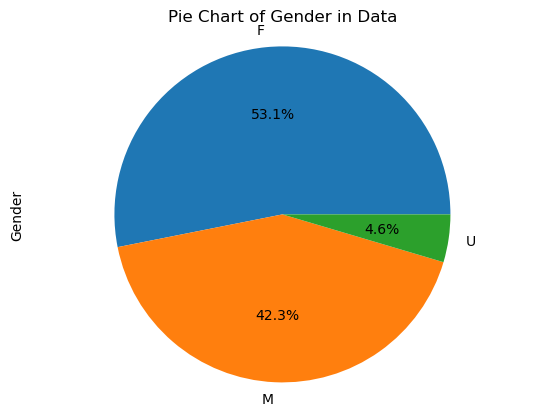

In [24]:
data.Gender.value_counts().plot.pie(autopct='%1.1f%%',
                                     title = "Pie Chart of Gender in Data")
plt.axis('equal')
plt.show()

### Explore Relationship Between Categorical & Target Variable

**Hint**: use `sns.countplot()` plot

[Text(0, 0, '102'),
 Text(0, 0, '43'),
 Text(0, 0, '12'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '0')]

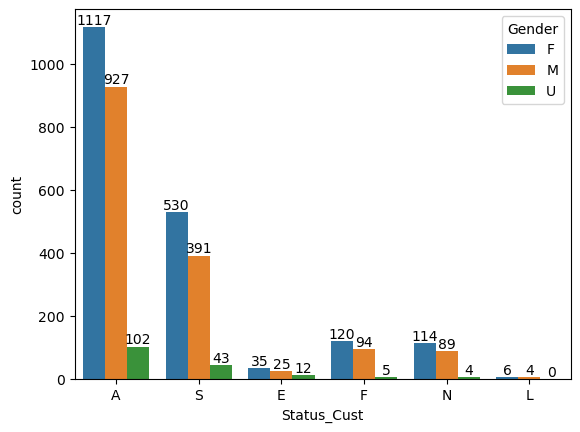

In [25]:
data_plot = sns.countplot(x="Status_Cust", hue="Gender",data=data)

data_plot.bar_label(data_plot.containers[0])
data_plot.bar_label(data_plot.containers[1])
data_plot.bar_label(data_plot.containers[2])

<AxesSubplot: xlabel='Status_Cust', ylabel='count'>

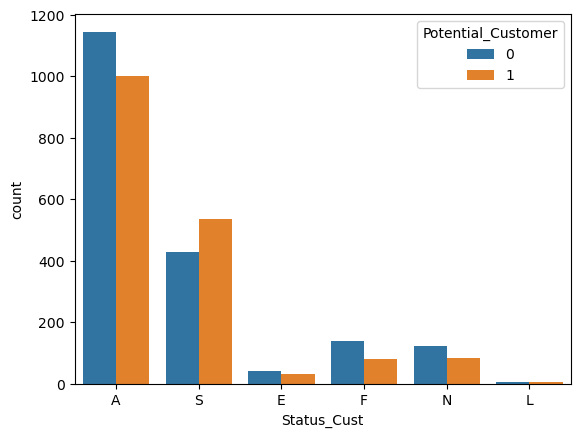

In [26]:
display(sns.countplot(x='Status_Cust', hue= 'Potential_Customer', data=data))

<AxesSubplot: xlabel='Potential_Customer', ylabel='count'>

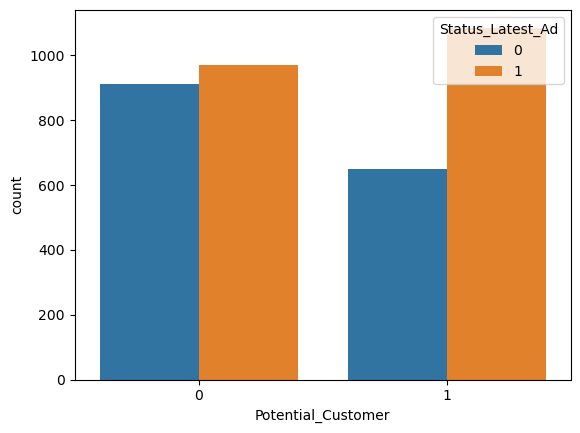

In [27]:
sns.countplot(x= 'Potential_Customer', hue='Status_Latest_Ad', data=data)

<AxesSubplot: xlabel='Gender', ylabel='count'>

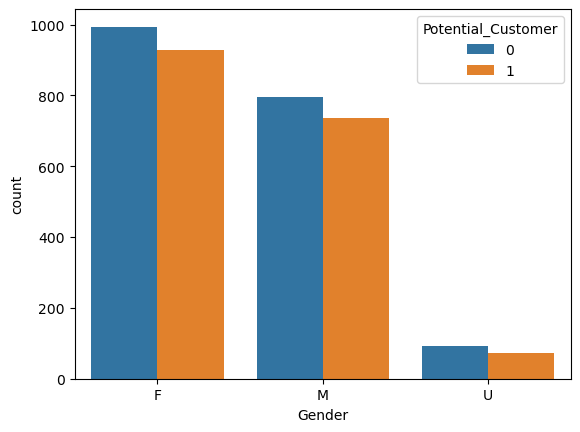

In [28]:
sns.countplot(x='Gender', hue= 'Potential_Customer', data=data)

<AxesSubplot: xlabel='Cust_Prop', ylabel='count'>

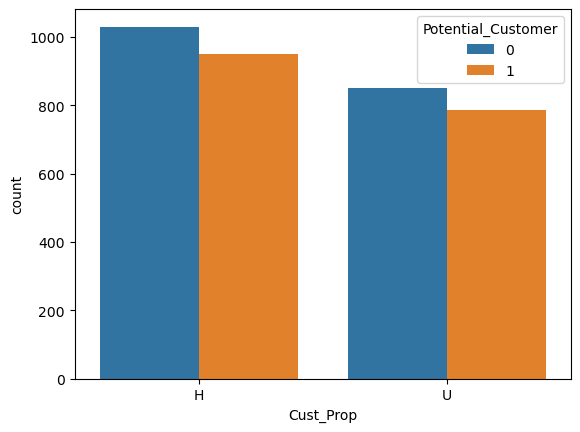

In [29]:
sns.countplot(x='Cust_Prop', hue= 'Potential_Customer', data=data)


### Insight

Based on the bar graph, potential customers are likely from customers who are from active buyers categories

### Solution

#how to improve your visualization
#group the data (grouping: E with L and N with F)
#E&L could be categorize as others while N and F can be categorize into New buyer as to detect the successfulness of the 
#promotional event

## Explore Numerical Variables

**Hint**: use `sns.distplot()` and `sns.boxplot()`

In [30]:
data.describe(include = 'all')

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
count,3618.000000,3618.000000,1736.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,...,3618.000000,3618.000000,3618.000000,3618.000000,3618,3618.000000,2825.000000,3618,3618,3618.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6,NaN,NaN,3,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,A,NaN,NaN,F,H,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2146,NaN,NaN,1922,1981,NaN
mean,0.479823,70151.997236,14.557748,3.308734,11.018795,1.909066,5.887507,15.267344,14.309536,11.913532,...,49.613875,5.403814,12.064400,19.508292,NaN,0.568546,59.018761,NaN,NaN,41608.894417
std,0.499662,35499.154163,11.566174,2.185492,9.405537,1.624995,4.904147,10.794970,10.060256,8.046675,...,22.864578,1.356644,4.569374,8.547971,NaN,0.495348,16.900077,NaN,NaN,26127.991993
min,0.000000,12.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.500000,...,7.000000,1.000000,2.000000,3.000000,NaN,0.000000,0.000000,NaN,NaN,0.000000
25%,0.000000,50146.500000,8.000000,2.000000,4.000000,1.000000,2.000000,10.000000,9.000000,7.500000,...,31.000000,5.000000,8.000000,13.000000,NaN,0.000000,47.000000,NaN,NaN,31385.750000
50%,0.000000,68694.000000,11.000000,3.000000,9.000000,2.000000,5.000000,15.000000,13.000000,10.295000,...,50.000000,6.000000,13.000000,20.000000,NaN,1.000000,60.000000,NaN,NaN,44284.500000
75%,1.000000,87779.500000,20.000000,4.000000,15.000000,3.000000,9.000000,20.000000,17.500000,14.787500,...,66.000000,6.000000,16.000000,27.000000,NaN,1.000000,73.000000,NaN,NaN,56508.000000


<AxesSubplot: xlabel='Pur_latest', ylabel='Density'>

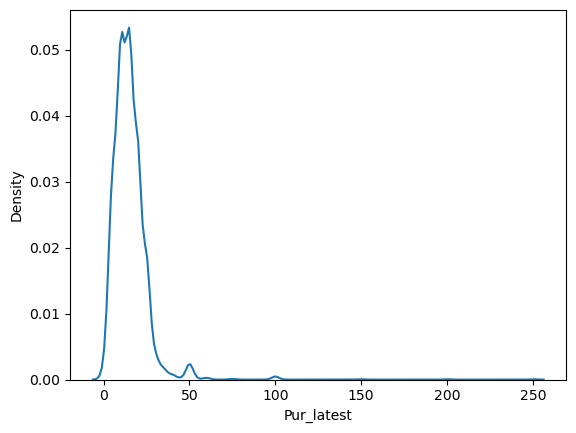

In [31]:
sns.distplot(data['Pur_latest'], hist = False)

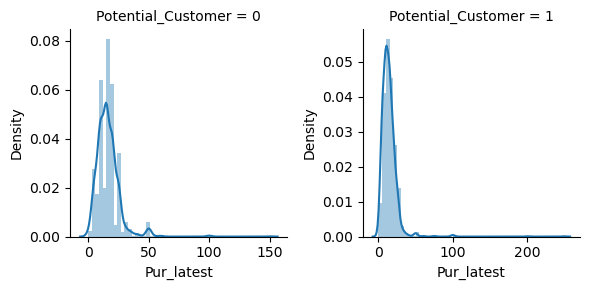

In [32]:
g = sns.FacetGrid(data, col = "Potential_Customer", sharex = False, sharey = False)
g.map(sns.distplot, "Pur_latest")

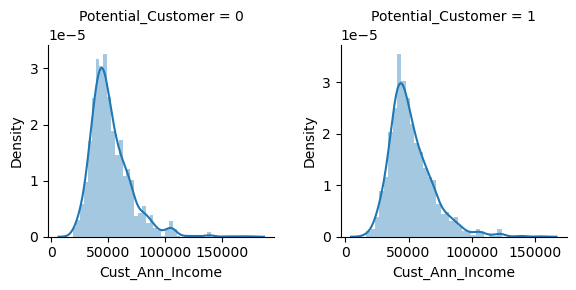

In [33]:
data_dropincomezero = data[data['Cust_Ann_Income'] != 0]
g = sns.FacetGrid(data_dropincomezero, col = "Potential_Customer", sharex = False, sharey = False)
g.map(sns.distplot, "Cust_Ann_Income")

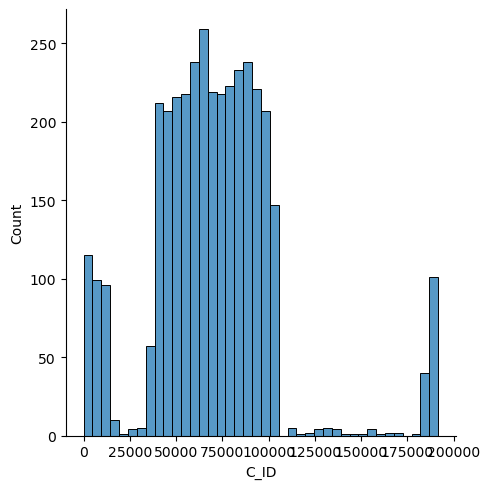

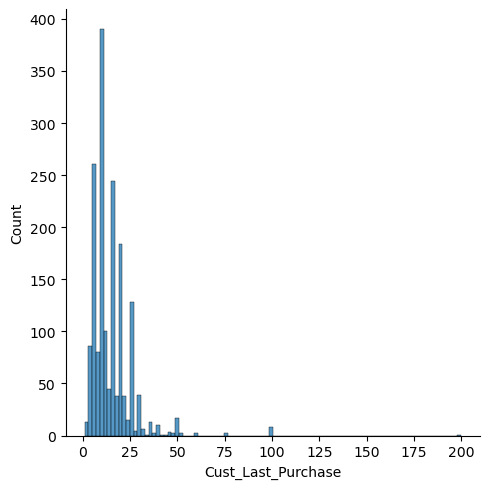

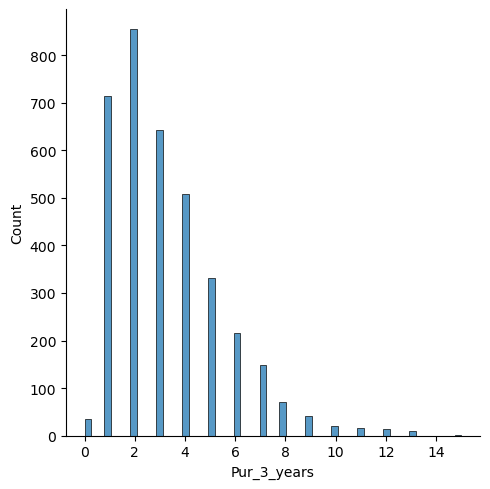

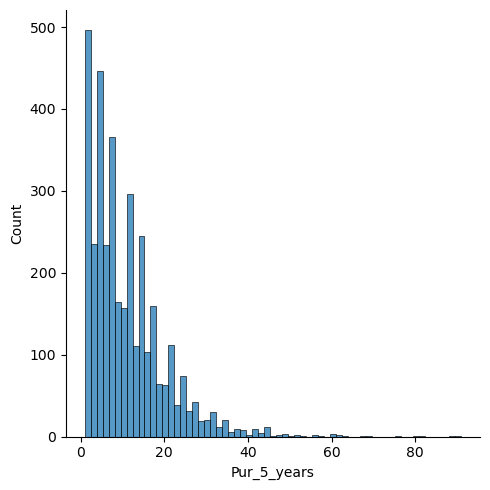

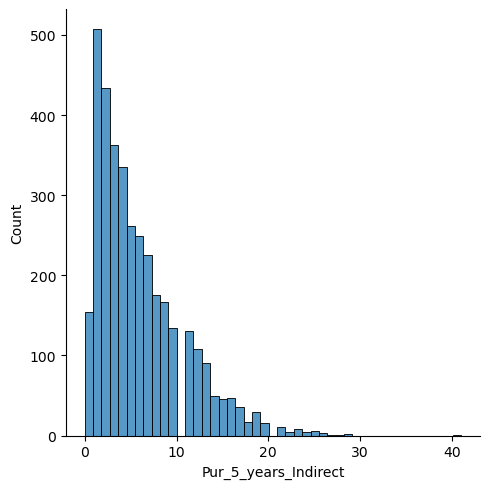

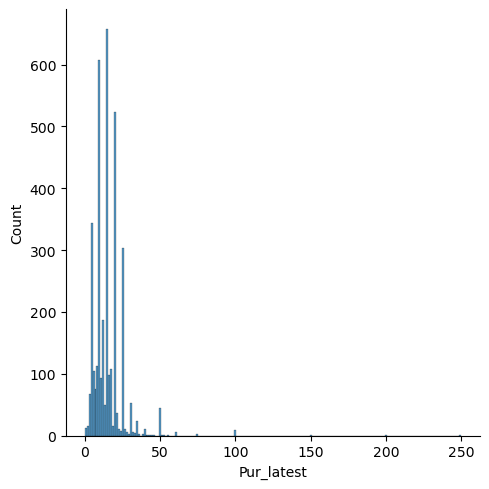

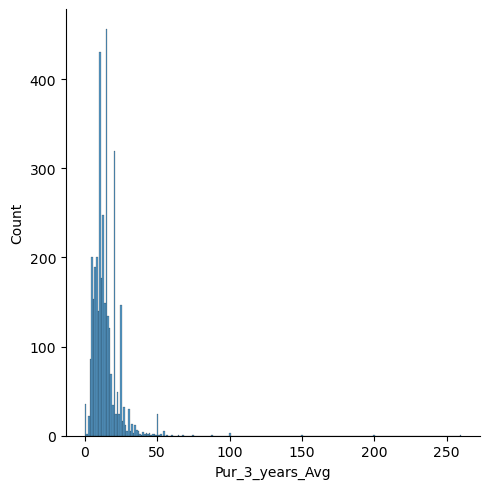

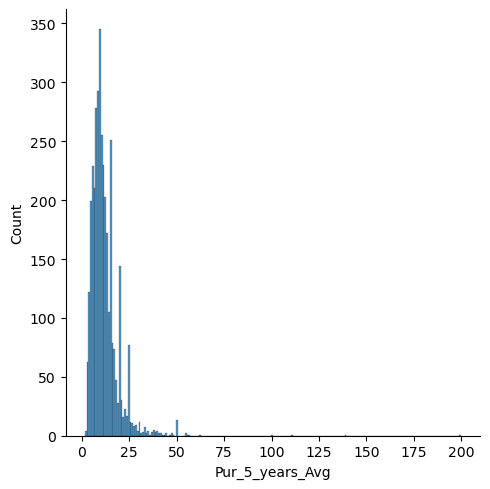

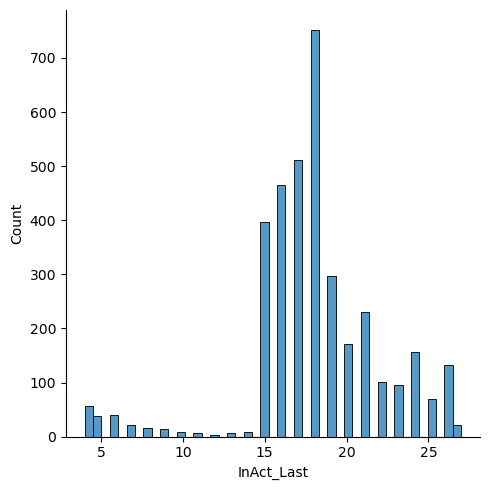

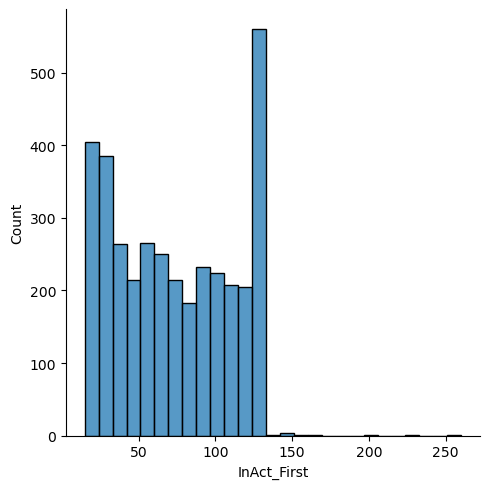

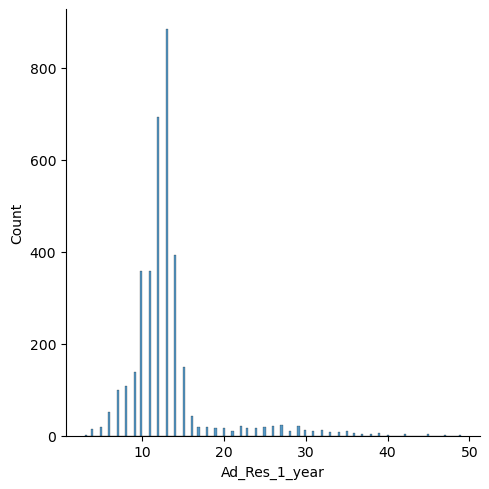

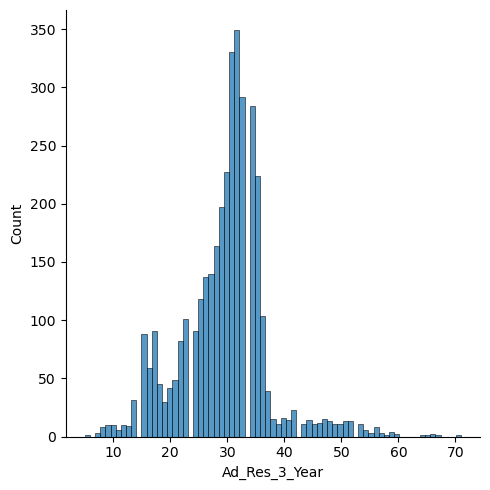

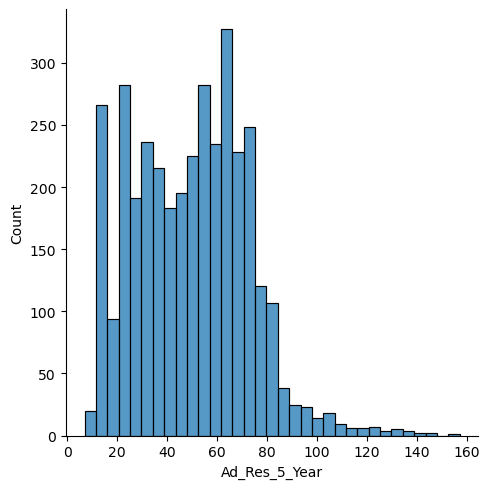

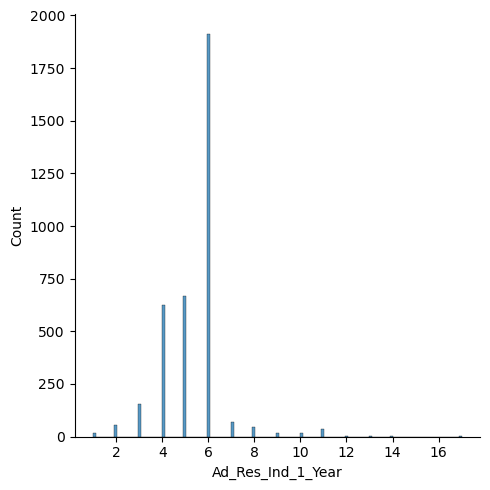

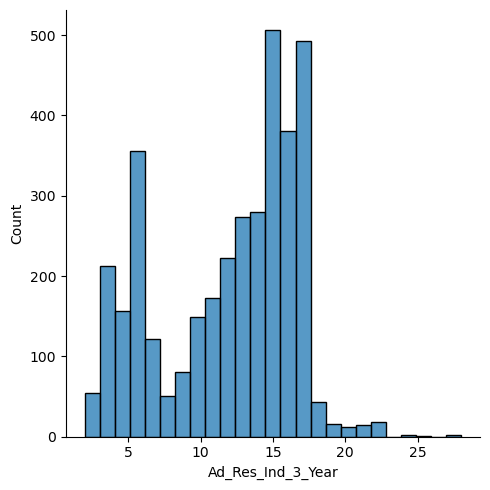

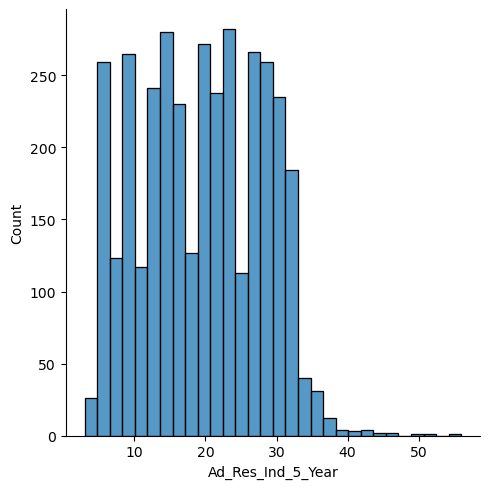

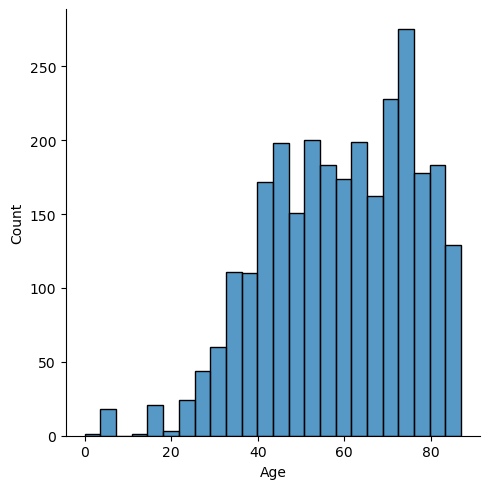

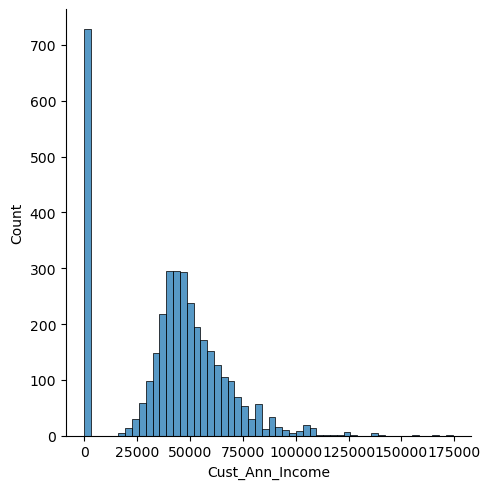

In [34]:
m1 = data.columns[data.nunique() > 10]
m2 = data.columns[data.dtypes == 'object']
lis = []
for i in m1:
    if i not in m2:
        lis.append(i)
        
for num_att in lis:
    sns.displot(data=data, x=num_att)

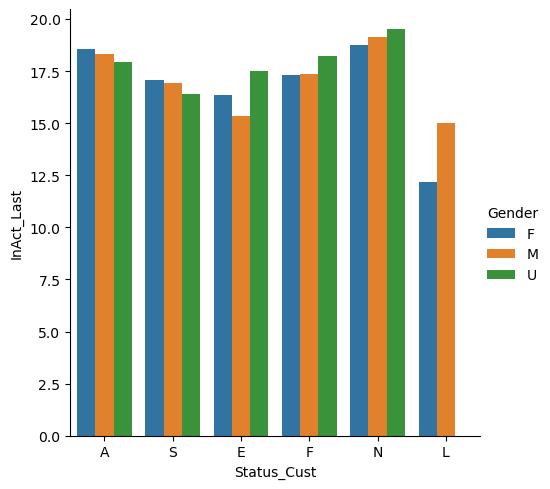

In [35]:
sns.catplot(x="Status_Cust", y="InAct_Last", hue="Gender", kind="bar", ci = None, data=data)

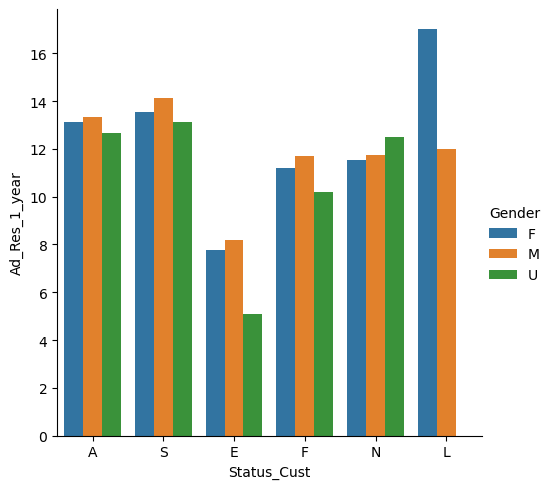

In [36]:
sns.catplot(x="Status_Cust", y="Ad_Res_1_year", hue="Gender", kind="bar", ci = None, data=data)

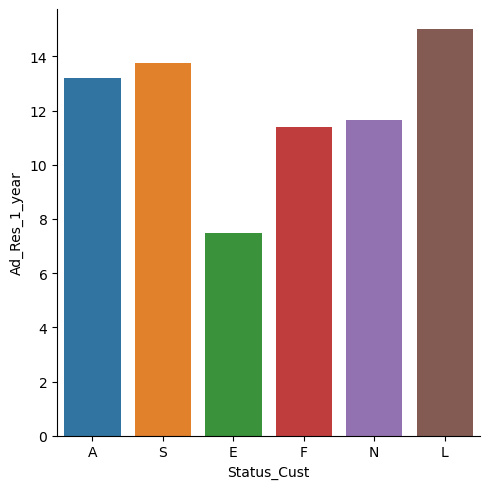

In [37]:
sns.catplot(x="Status_Cust", y="Ad_Res_1_year", kind="bar", ci = None, data=data)

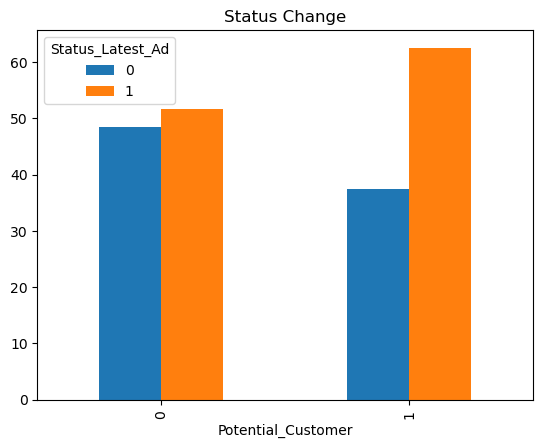

In [38]:
#Your Code Here
(pd.crosstab(data.loc[:, "Potential_Customer"], 
            data.loc[:, "Status_Latest_Ad"], 
            normalize = "index") * 100).round(2).plot.bar(title = "Status Change");

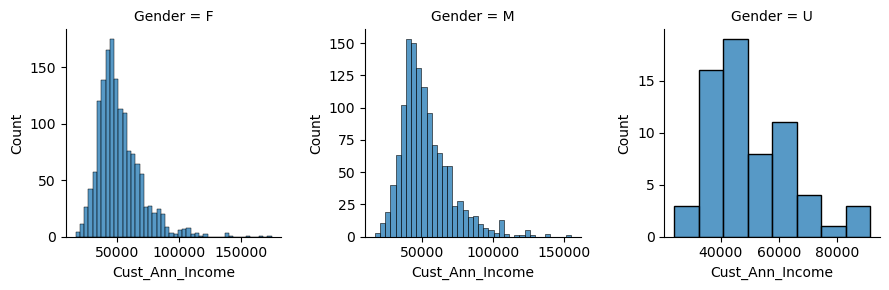

In [39]:
data_dropincomezero = data[data['Cust_Ann_Income'] != 0]
g = sns.FacetGrid(data_dropincomezero, col = "Gender", sharex = False, sharey = False)
g.map(sns.histplot, "Cust_Ann_Income")

###  Check the skewness and kurtosis of the variables? Is it normal? Document your process in the notebook of handling skewness and kurtosis


In [40]:
#Your Code Here
from scipy.stats import norm, poisson, uniform, skew, kurtosis, iqr 

In [41]:
data.dtypes

Potential_Customer            int64
C_ID                          int64
Cust_Last_Purchase          float64
Pur_3_years                   int64
Pur_5_years                   int64
Pur_3_years_Indirect          int64
Pur_5_years_Indirect          int64
Pur_latest                  float64
Pur_3_years_Avg             float64
Pur_5_years_Avg             float64
Pur_3_years_Avg_Indirect     object
InAct_Last                    int64
InAct_First                   int64
Ad_Res_1_year                 int64
Ad_Res_3_Year                 int64
Ad_Res_5_Year                 int64
Ad_Res_Ind_1_Year             int64
Ad_Res_Ind_3_Year             int64
Ad_Res_Ind_5_Year             int64
Status_Cust                  object
Status_Latest_Ad              int64
Age                         float64
Gender                       object
Cust_Prop                    object
Cust_Ann_Income             float64
dtype: object

In [42]:
data.skew()

Potential_Customer      0.080807
C_ID                    1.026921
Cust_Last_Purchase      4.966810
Pur_3_years             1.291322
Pur_5_years             2.079296
Pur_3_years_Indirect    1.124769
Pur_5_years_Indirect    1.287071
Pur_latest              6.660116
Pur_3_years_Avg         7.913836
Pur_5_years_Avg         6.756579
InAct_Last             -0.808274
InAct_First             0.136455
Ad_Res_1_year           2.788479
Ad_Res_3_Year           0.321259
Ad_Res_5_Year           0.401333
Ad_Res_Ind_1_Year       0.943712
Ad_Res_Ind_3_Year      -0.448007
Ad_Res_Ind_5_Year       0.068045
Status_Latest_Ad       -0.276913
Age                    -0.406354
Cust_Ann_Income         0.039826
dtype: float64

In [43]:
#positive Skew: left skewness
print('Cust Annual Income Skewness : ', round(skew
                (data_dropincomezero['Cust_Ann_Income'], bias = 0), 4))

Cust Annual Income Skewness :  1.512


In [44]:
#leptokurtic
kurtosis(data_dropincomezero['Cust_Ann_Income'], bias = 0)

4.267254909846833

In [45]:
data.groupby('Status_Cust').apply(lambda x: x.kurtosis())

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,...,InAct_First,Ad_Res_1_year,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Latest_Ad,Age,Cust_Ann_Income
Status_Cust,,,,,,,,,,,,,,,,,,,,,
A,-1.983732,3.146559,18.994463,1.507890,19.363312,0.856897,2.610659,31.864329,170.127060,61.339490,...,-0.851067,10.004780,3.706003,0.818724,9.218037,-0.822947,-0.466976,-1.989708,-0.527756,0.341370
E,-1.973543,-1.583173,5.344711,-0.781762,0.268210,-0.898709,0.718575,11.280166,13.911923,12.496281,...,-0.883751,4.566799,-0.568871,-0.004800,0.780734,-0.022128,-0.115476,-1.935333,-0.837987,-0.300439
F,-1.698213,3.923871,42.655833,32.447522,45.271757,23.091860,54.368621,78.839143,77.332385,96.917767,...,28.713045,13.369160,9.648755,20.006764,9.160219,12.067585,26.906605,10.987684,-0.755328,0.680943
L,-2.276786,0.511016,2.227147,5.356401,7.376026,1.185268,3.135491,-0.278199,-0.675623,-0.429041,...,-1.004217,1.529616,0.794608,-0.192456,4.300457,-1.252793,-0.156265,-2.571429,-0.766977,-0.132456
N,-1.884347,2.795016,9.158768,2.597719,42.961277,4.753649,34.224176,6.543189,5.101607,6.626273,...,55.588073,4.860512,6.885467,36.291082,2.907165,3.912717,34.770081,2.149918,-0.628753,0.199529
S,-1.954952,2.912879,41.136163,1.015033,6.963512,-0.107998,1.712795,31.666008,11.996816,13.102625,...,-0.642478,10.686875,6.000435,2.480336,14.260489,2.425350,-0.165442,0.000000,0.180367,1.061955


In [46]:
# Filtering to numerical columns with more than 5 unique values
m1 = data.columns[data.nunique() > 10]
m2 = data.columns[data.dtypes == 'object']
lis = []
for i in m1:
    if i not in m2:
        lis.append(i)
# masking        
data_kurt = data.loc[:,lis]   

# assign the kurtosis for each columns
kurt_df = pd.DataFrame(data_kurt.kurtosis().sort_values(), columns=['kurtosis_Value'])
val = kurt_df.values.reshape(len(kurt_df),)
col_type = []
for i in val:
    if i > 0.2:
        col_type.append('leptokurtic')
    elif (i < 0.1) and (i >= 0):
        col_type.append('mesokurtic')
    elif (i > -0.1) and (i <= 0):
        col_type.append('mesokurtic')
    else:
        col_type.append('platykurtic')
kurt_df['kurtosis_type'] = col_type
kurt_df.head(17)

,kurtosis_Value,kurtosis_type
InAct_First,-1.171029,platykurtic
Ad_Res_Ind_3_Year,-0.898953,platykurtic
Ad_Res_Ind_5_Year,-0.813542,platykurtic
Age,-0.441947,platykurtic
Ad_Res_5_Year,0.235607,leptokurtic
Cust_Ann_Income,0.438975,leptokurtic
Pur_5_years_Indirect,2.046352,leptokurtic
Pur_3_years,2.115542,leptokurtic
Ad_Res_3_Year,2.171718,leptokurtic
InAct_Last,2.506173,leptokurtic


### Insight

## Check the data for missing values?

In [47]:
#Your Code Here
data.isnull()

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3613,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3614,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3615,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3616,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [48]:
display(data.isnull().values.sum())

3337

In [49]:
# Count all NaN in each column
#Your Code Here
data.isnull().sum(axis = 0)

Potential_Customer             0
C_ID                           0
Cust_Last_Purchase          1882
Pur_3_years                    0
Pur_5_years                    0
Pur_3_years_Indirect           0
Pur_5_years_Indirect           0
Pur_latest                     0
Pur_3_years_Avg                0
Pur_5_years_Avg                0
Pur_3_years_Avg_Indirect     662
InAct_Last                     0
InAct_First                    0
Ad_Res_1_year                  0
Ad_Res_3_Year                  0
Ad_Res_5_Year                  0
Ad_Res_Ind_1_Year              0
Ad_Res_Ind_3_Year              0
Ad_Res_Ind_5_Year              0
Status_Cust                    0
Status_Latest_Ad               0
Age                          793
Gender                         0
Cust_Prop                      0
Cust_Ann_Income                0
dtype: int64

In [50]:
# Count all NaN in the dataframe (both columns & Rows)
#Your Code Here
count_nan = data.isna().sum().sum()

print ('Count of NaN: ' + str(count_nan))

Count of NaN: 3337


In [51]:
#count NaN in each rows
for i in range(len(data.index)) :
    print("Nan in row ", i , " : " ,  data.iloc[i].isnull().sum())

Nan in row  0  :  0
Nan in row  1  :  1
Nan in row  2  :  1
Nan in row  3  :  1
Nan in row  4  :  0
Nan in row  5  :  0
Nan in row  6  :  1
Nan in row  7  :  1
Nan in row  8  :  0
Nan in row  9  :  1
Nan in row  10  :  2
Nan in row  11  :  1
Nan in row  12  :  1
Nan in row  13  :  0
Nan in row  14  :  1
Nan in row  15  :  1
Nan in row  16  :  1
Nan in row  17  :  2
Nan in row  18  :  0
Nan in row  19  :  2
Nan in row  20  :  1
Nan in row  21  :  1
Nan in row  22  :  2
Nan in row  23  :  1
Nan in row  24  :  2
Nan in row  25  :  2
Nan in row  26  :  0
Nan in row  27  :  1
Nan in row  28  :  1
Nan in row  29  :  1
Nan in row  30  :  0
Nan in row  31  :  1
Nan in row  32  :  1
Nan in row  33  :  2
Nan in row  34  :  2
Nan in row  35  :  1
Nan in row  36  :  0
Nan in row  37  :  0
Nan in row  38  :  1
Nan in row  39  :  0
Nan in row  40  :  1
Nan in row  41  :  1
Nan in row  42  :  0
Nan in row  43  :  1
Nan in row  44  :  1
Nan in row  45  :  0
Nan in row  46  :  2
Nan in row  47  :  2
Na

Nan in row  479  :  2
Nan in row  480  :  1
Nan in row  481  :  1
Nan in row  482  :  0
Nan in row  483  :  1
Nan in row  484  :  1
Nan in row  485  :  1
Nan in row  486  :  0
Nan in row  487  :  2
Nan in row  488  :  0
Nan in row  489  :  0
Nan in row  490  :  1
Nan in row  491  :  2
Nan in row  492  :  0
Nan in row  493  :  1
Nan in row  494  :  2
Nan in row  495  :  2
Nan in row  496  :  1
Nan in row  497  :  1
Nan in row  498  :  0
Nan in row  499  :  1
Nan in row  500  :  1
Nan in row  501  :  1
Nan in row  502  :  0
Nan in row  503  :  2
Nan in row  504  :  1
Nan in row  505  :  0
Nan in row  506  :  1
Nan in row  507  :  1
Nan in row  508  :  1
Nan in row  509  :  1
Nan in row  510  :  1
Nan in row  511  :  3
Nan in row  512  :  0
Nan in row  513  :  1
Nan in row  514  :  2
Nan in row  515  :  1
Nan in row  516  :  0
Nan in row  517  :  1
Nan in row  518  :  1
Nan in row  519  :  0
Nan in row  520  :  0
Nan in row  521  :  0
Nan in row  522  :  0
Nan in row  523  :  1
Nan in row

Nan in row  1287  :  2
Nan in row  1288  :  2
Nan in row  1289  :  1
Nan in row  1290  :  0
Nan in row  1291  :  0
Nan in row  1292  :  3
Nan in row  1293  :  2
Nan in row  1294  :  1
Nan in row  1295  :  1
Nan in row  1296  :  0
Nan in row  1297  :  0
Nan in row  1298  :  0
Nan in row  1299  :  0
Nan in row  1300  :  1
Nan in row  1301  :  2
Nan in row  1302  :  2
Nan in row  1303  :  1
Nan in row  1304  :  1
Nan in row  1305  :  0
Nan in row  1306  :  1
Nan in row  1307  :  0
Nan in row  1308  :  1
Nan in row  1309  :  2
Nan in row  1310  :  0
Nan in row  1311  :  0
Nan in row  1312  :  0
Nan in row  1313  :  1
Nan in row  1314  :  0
Nan in row  1315  :  0
Nan in row  1316  :  1
Nan in row  1317  :  0
Nan in row  1318  :  0
Nan in row  1319  :  1
Nan in row  1320  :  1
Nan in row  1321  :  0
Nan in row  1322  :  1
Nan in row  1323  :  1
Nan in row  1324  :  2
Nan in row  1325  :  1
Nan in row  1326  :  0
Nan in row  1327  :  1
Nan in row  1328  :  0
Nan in row  1329  :  1
Nan in row 

Nan in row  1794  :  1
Nan in row  1795  :  1
Nan in row  1796  :  1
Nan in row  1797  :  0
Nan in row  1798  :  1
Nan in row  1799  :  2
Nan in row  1800  :  0
Nan in row  1801  :  1
Nan in row  1802  :  1
Nan in row  1803  :  0
Nan in row  1804  :  2
Nan in row  1805  :  1
Nan in row  1806  :  2
Nan in row  1807  :  0
Nan in row  1808  :  1
Nan in row  1809  :  0
Nan in row  1810  :  1
Nan in row  1811  :  1
Nan in row  1812  :  0
Nan in row  1813  :  1
Nan in row  1814  :  0
Nan in row  1815  :  1
Nan in row  1816  :  2
Nan in row  1817  :  0
Nan in row  1818  :  0
Nan in row  1819  :  1
Nan in row  1820  :  1
Nan in row  1821  :  0
Nan in row  1822  :  1
Nan in row  1823  :  1
Nan in row  1824  :  1
Nan in row  1825  :  0
Nan in row  1826  :  2
Nan in row  1827  :  1
Nan in row  1828  :  2
Nan in row  1829  :  3
Nan in row  1830  :  0
Nan in row  1831  :  1
Nan in row  1832  :  0
Nan in row  1833  :  1
Nan in row  1834  :  0
Nan in row  1835  :  0
Nan in row  1836  :  1
Nan in row 

Nan in row  2621  :  0
Nan in row  2622  :  0
Nan in row  2623  :  1
Nan in row  2624  :  1
Nan in row  2625  :  0
Nan in row  2626  :  1
Nan in row  2627  :  3
Nan in row  2628  :  1
Nan in row  2629  :  1
Nan in row  2630  :  1
Nan in row  2631  :  0
Nan in row  2632  :  1
Nan in row  2633  :  1
Nan in row  2634  :  2
Nan in row  2635  :  1
Nan in row  2636  :  0
Nan in row  2637  :  1
Nan in row  2638  :  1
Nan in row  2639  :  1
Nan in row  2640  :  0
Nan in row  2641  :  1
Nan in row  2642  :  1
Nan in row  2643  :  2
Nan in row  2644  :  2
Nan in row  2645  :  0
Nan in row  2646  :  0
Nan in row  2647  :  1
Nan in row  2648  :  1
Nan in row  2649  :  2
Nan in row  2650  :  2
Nan in row  2651  :  0
Nan in row  2652  :  1
Nan in row  2653  :  2
Nan in row  2654  :  1
Nan in row  2655  :  0
Nan in row  2656  :  0
Nan in row  2657  :  0
Nan in row  2658  :  1
Nan in row  2659  :  1
Nan in row  2660  :  2
Nan in row  2661  :  0
Nan in row  2662  :  1
Nan in row  2663  :  0
Nan in row 

Nan in row  3083  :  1
Nan in row  3084  :  0
Nan in row  3085  :  2
Nan in row  3086  :  1
Nan in row  3087  :  1
Nan in row  3088  :  0
Nan in row  3089  :  1
Nan in row  3090  :  1
Nan in row  3091  :  0
Nan in row  3092  :  0
Nan in row  3093  :  0
Nan in row  3094  :  2
Nan in row  3095  :  1
Nan in row  3096  :  1
Nan in row  3097  :  1
Nan in row  3098  :  2
Nan in row  3099  :  1
Nan in row  3100  :  0
Nan in row  3101  :  2
Nan in row  3102  :  1
Nan in row  3103  :  1
Nan in row  3104  :  1
Nan in row  3105  :  1
Nan in row  3106  :  1
Nan in row  3107  :  0
Nan in row  3108  :  0
Nan in row  3109  :  1
Nan in row  3110  :  1
Nan in row  3111  :  0
Nan in row  3112  :  2
Nan in row  3113  :  1
Nan in row  3114  :  1
Nan in row  3115  :  0
Nan in row  3116  :  0
Nan in row  3117  :  0
Nan in row  3118  :  0
Nan in row  3119  :  0
Nan in row  3120  :  0
Nan in row  3121  :  1
Nan in row  3122  :  0
Nan in row  3123  :  2
Nan in row  3124  :  0
Nan in row  3125  :  1
Nan in row 

### How should we handle missing values? (Should we drop the rows? or impute them with values?)

In [52]:
#Find which columns have missing value
#Your Code Here
#impute will values
data.isnull().sum().sort_values(ascending = False).head(4)

Cust_Last_Purchase          1882
Age                          793
Pur_3_years_Avg_Indirect     662
Potential_Customer             0
dtype: int64

In [53]:
#Find which columns have missing value
#Your Code Here

data.isnull().sum(axis = 0)

Potential_Customer             0
C_ID                           0
Cust_Last_Purchase          1882
Pur_3_years                    0
Pur_5_years                    0
Pur_3_years_Indirect           0
Pur_5_years_Indirect           0
Pur_latest                     0
Pur_3_years_Avg                0
Pur_5_years_Avg                0
Pur_3_years_Avg_Indirect     662
InAct_Last                     0
InAct_First                    0
Ad_Res_1_year                  0
Ad_Res_3_Year                  0
Ad_Res_5_Year                  0
Ad_Res_Ind_1_Year              0
Ad_Res_Ind_3_Year              0
Ad_Res_Ind_5_Year              0
Status_Cust                    0
Status_Latest_Ad               0
Age                          793
Gender                         0
Cust_Prop                      0
Cust_Ann_Income                0
dtype: int64

#### Handling Missing Value for `Cust_Last_Purchase` column

In [54]:
#Impute the missing values for Cust_Last_Purchase column
#Your Code Here

data2 = pd.DataFrame(data).copy()
data2["Cust_Last_Purchase"].fillna(0, inplace = True)

In [55]:
data2['Cust_Last_Purchase'].isnull().sum()

0

In [56]:
data2.isnull().sum(axis = 0)

Potential_Customer            0
C_ID                          0
Cust_Last_Purchase            0
Pur_3_years                   0
Pur_5_years                   0
Pur_3_years_Indirect          0
Pur_5_years_Indirect          0
Pur_latest                    0
Pur_3_years_Avg               0
Pur_5_years_Avg               0
Pur_3_years_Avg_Indirect    662
InAct_Last                    0
InAct_First                   0
Ad_Res_1_year                 0
Ad_Res_3_Year                 0
Ad_Res_5_Year                 0
Ad_Res_Ind_1_Year             0
Ad_Res_Ind_3_Year             0
Ad_Res_Ind_5_Year             0
Status_Cust                   0
Status_Latest_Ad              0
Age                         793
Gender                        0
Cust_Prop                     0
Cust_Ann_Income               0
dtype: int64

#### Handling Missing Value for `Pur_3_years_Avg_Indirect` column 

In [57]:
#Impute the missing values for Pur_3_years_Avg_Indirect column
#Your Code Here
data2["Pur_3_years_Avg_Indirect"].fillna("0.0", inplace = True)

In [58]:
data2.isnull().sum(axis = 0)

Potential_Customer            0
C_ID                          0
Cust_Last_Purchase            0
Pur_3_years                   0
Pur_5_years                   0
Pur_3_years_Indirect          0
Pur_5_years_Indirect          0
Pur_latest                    0
Pur_3_years_Avg               0
Pur_5_years_Avg               0
Pur_3_years_Avg_Indirect      0
InAct_Last                    0
InAct_First                   0
Ad_Res_1_year                 0
Ad_Res_3_Year                 0
Ad_Res_5_Year                 0
Ad_Res_Ind_1_Year             0
Ad_Res_Ind_3_Year             0
Ad_Res_Ind_5_Year             0
Status_Cust                   0
Status_Latest_Ad              0
Age                         793
Gender                        0
Cust_Prop                     0
Cust_Ann_Income               0
dtype: int64

#### Handling Missing Value for `Age` column

Changes for Age is omitted since it is not relevant to change missing value of age to 0.

In [59]:
#Impute the missing values for Age column
#Your Code Here
#customers2.dropna(subset =["Age"], how='all', inplace=True)

In [60]:
data2.Age.describe()

count    2825.000000
mean       59.018761
std        16.900077
min         0.000000
25%        47.000000
50%        60.000000
75%        73.000000
max        87.000000
Name: Age, dtype: float64

In [61]:
data_nan = data2['Age'].fillna(0,inplace=True)
data_nan

In [62]:
data.loc[data2["Age"]<=14]

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
1,1,87939,30.0,1,7,0,3,25.0,25.00,13.00,...,55,6,6,22,A,1,7.0,M,U,0.0
19,0,88363,NaN,4,5,3,3,25.0,21.25,22.00,...,31,6,15,13,A,0,NaN,M,U,100910.0
25,0,88900,NaN,5,8,1,1,10.0,7.60,8.88,...,38,6,16,16,A,0,NaN,M,U,0.0
28,1,88474,5.0,4,12,3,6,10.0,11.00,9.83,...,58,5,15,22,S,1,NaN,M,H,107272.0
33,0,88542,NaN,1,4,1,3,25.0,25.00,16.25,...,45,6,15,17,A,0,NaN,M,U,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3600,1,2950,2.0,2,20,0,5,5.0,8.00,4.85,...,78,6,6,21,S,1,NaN,M,H,48045.0
3601,0,87573,NaN,2,14,0,11,15.0,15.00,8.79,...,63,3,3,27,A,1,NaN,U,U,0.0
3602,0,87572,NaN,6,12,4,6,5.0,6.17,4.75,...,46,6,15,18,A,1,NaN,M,U,22837.0
3607,1,87680,12.0,5,23,5,16,12.0,11.20,8.04,...,74,5,15,31,S,1,NaN,F,U,41070.0


In [63]:
data2['Age'].isna().sum()

0

In [64]:
data2.isna().sum()

Potential_Customer          0
C_ID                        0
Cust_Last_Purchase          0
Pur_3_years                 0
Pur_5_years                 0
Pur_3_years_Indirect        0
Pur_5_years_Indirect        0
Pur_latest                  0
Pur_3_years_Avg             0
Pur_5_years_Avg             0
Pur_3_years_Avg_Indirect    0
InAct_Last                  0
InAct_First                 0
Ad_Res_1_year               0
Ad_Res_3_Year               0
Ad_Res_5_Year               0
Ad_Res_Ind_1_Year           0
Ad_Res_Ind_3_Year           0
Ad_Res_Ind_5_Year           0
Status_Cust                 0
Status_Latest_Ad            0
Age                         0
Gender                      0
Cust_Prop                   0
Cust_Ann_Income             0
dtype: int64

#### Handling Missing Value for `Cust_Ann_Income` column 

In [65]:
#Your Code Here
data2['Cust_Ann_Income'] = data2['Cust_Ann_Income'].replace( 0, data2['Cust_Ann_Income'].median())
data2.head()

#data_dropincomezero = data[data['Cust_Ann_Income'] != 0]
#data_dropincomezero.head()

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,9946,5.0,2,17,2,4,0.0,7.50,7.76,...,73,3,12,16,A,0,71.0,F,H,65957.0
1,1,87939,30.0,1,7,0,3,25.0,25.00,13.00,...,55,6,6,22,A,1,7.0,M,U,44284.5
2,0,88003,0.0,5,12,3,5,15.0,15.00,11.25,...,53,6,17,22,S,1,79.0,F,U,44284.5
3,1,188721,20.0,1,11,0,3,20.0,20.00,12.45,...,71,8,8,33,A,0,73.0,F,U,76293.0
4,1,88056,5.0,3,15,2,7,3.0,4.33,3.80,...,63,6,12,24,S,1,68.0,F,H,113663.0


In [66]:
data2['Cust_Ann_Income']==0.0

0       False
1       False
2       False
3       False
4       False
        ...  
3613    False
3614    False
3615    False
3616    False
3617    False
Name: Cust_Ann_Income, Length: 3618, dtype: bool

#### Handling Missing Value for `Gender` column

In [67]:
#Replace the missing values for Gender column
#Your Code Here

import random
def gender_Change(Gender):
    x = ['M', 'F']
    if Gender == 'U':
        return random.choice(x)
    elif Gender == 'F':
        return 'F'
    elif Gender == 'M':
        return 'M'
data2['Gender'] = data2['Gender'].apply(gender_Change)

In [68]:
#Your Code Here
data2.loc[data2['Gender'] == 'U']

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income


In [69]:
data2.Gender.value_counts()

F    2005
M    1613
Name: Gender, dtype: int64

### Explore the Relationship between Numerical Variables & Target Variable

In [70]:
#Your Code Here

# <font color=green>Insights through data visualization<font>

### Create a chart to visualize potential customer breakdown

<AxesSubplot: xlabel='Potential_Customer', ylabel='count'>

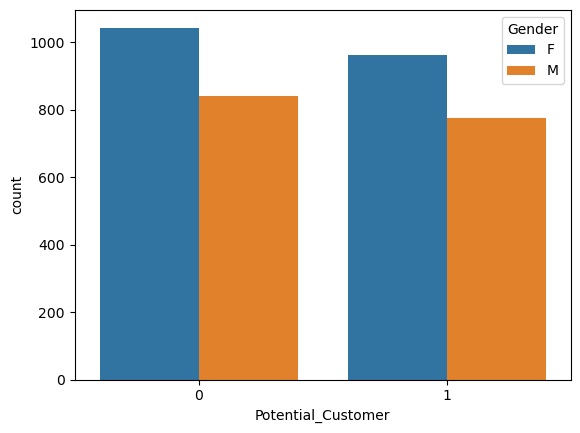

In [71]:
#Your Code Here
sns.countplot(x='Potential_Customer', hue= 'Gender', data=data2)

### How is the Age of the customers distributed? Plot your Answer with the appropriate chart

<AxesSubplot: xlabel='Age', ylabel='Density'>

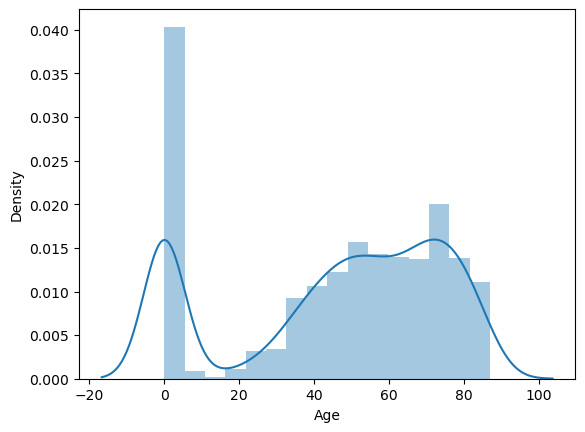

In [72]:
#Your Code Here
sns.distplot(data2['Age'], hist = True)

<AxesSubplot: xlabel='Age', ylabel='Density'>

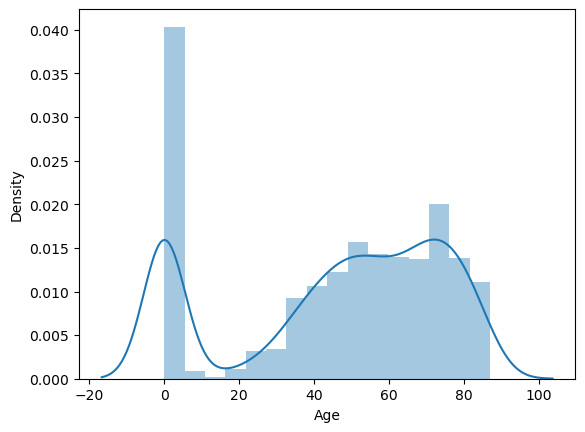

In [73]:
#bimodal distribution
sns.distplot(data2['Age'], hist = True)

In [74]:
skew = data2['Age'].skew()
kurtosis = data['Age'].kurtosis()
print("skewness of Age:", skew)
print("kurtosis of Age:", kurtosis)

skewness of Age: -0.5393781977789521
kurtosis of Age: -0.44194719763315415


### Explore the data by visualizing other features (such as customer annual income, distribution of gender)
- Start by asking questions that can add value to the business (example: how did my customers behaving lately?)
- Then continue by identifying which data are needed for the questions to be answered

<AxesSubplot: xlabel='Cust_Ann_Income', ylabel='Density'>

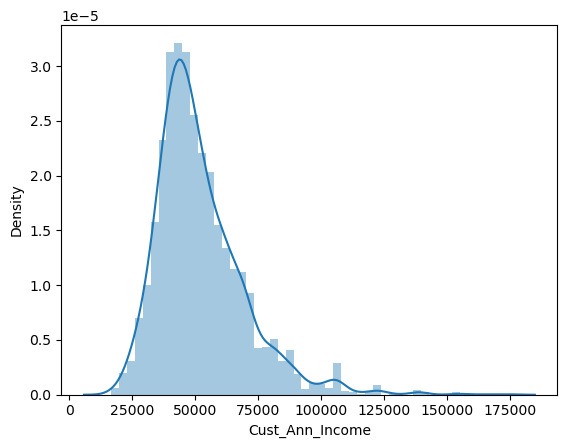

In [75]:
#Your Code Here #bimodal
sns.distplot(data_dropincomezero['Cust_Ann_Income'], hist = True)

In [76]:
skew = data2['Cust_Ann_Income'].skew()
kurtosis = data['Cust_Ann_Income'].kurtosis()
print("skewness of Cust_Ann_Income:", skew)
print("kurtosis of Cust_Ann_Income:", kurtosis)

skewness of Cust_Ann_Income: 1.8676060655554567
kurtosis of Cust_Ann_Income: 0.43897478990720673


<AxesSubplot: xlabel='InAct_First', ylabel='Density'>

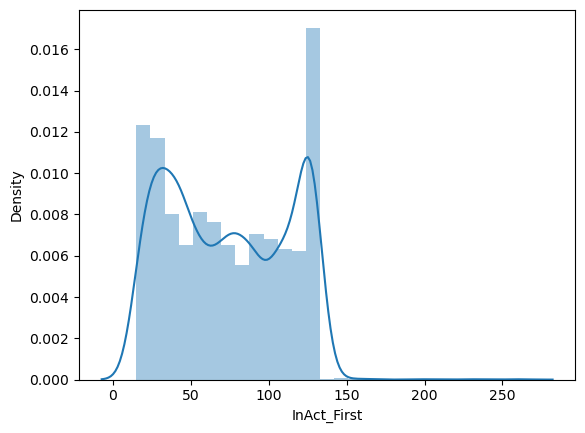

In [77]:
#Your Code Here
sns.distplot(data2['InAct_First'], hist = True)

In [78]:
skew = data2['InAct_First'].skew()
kurtosis = data['InAct_First'].kurtosis()
print("skewness of InAct_First:", skew)
print("kurtosis of InAct_First:", kurtosis)

skewness of InAct_First: 0.1364549965325427
kurtosis of InAct_First: -1.1710290394564056


<AxesSubplot: xlabel='Ad_Res_Ind_1_Year', ylabel='Density'>

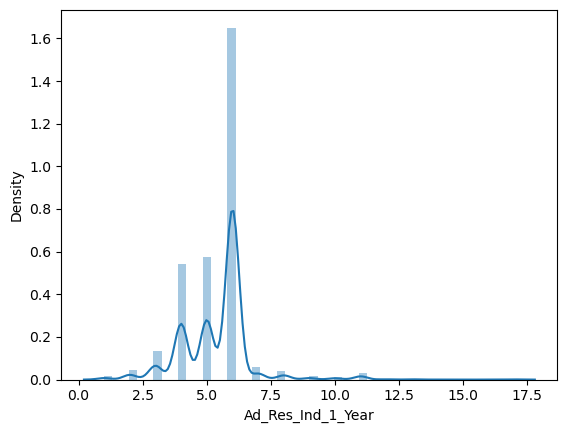

In [79]:
sns.distplot(data2['Ad_Res_Ind_1_Year'], hist = True)

In [80]:
skew = data2['Ad_Res_Ind_1_Year'].skew()
kurtosis = data['Ad_Res_Ind_1_Year'].kurtosis()
print("skewness of Ad_Res_Ind_1_Year:", skew)
print("kurtosis of Ad_Res_Ind_1_Year:", kurtosis)

skewness of Ad_Res_Ind_1_Year: 0.9437116388093629
kurtosis of Ad_Res_Ind_1_Year: 7.3049203923162835


### What is the distribution of customers' last purchase


<AxesSubplot: xlabel='Cust_Last_Purchase', ylabel='Density'>

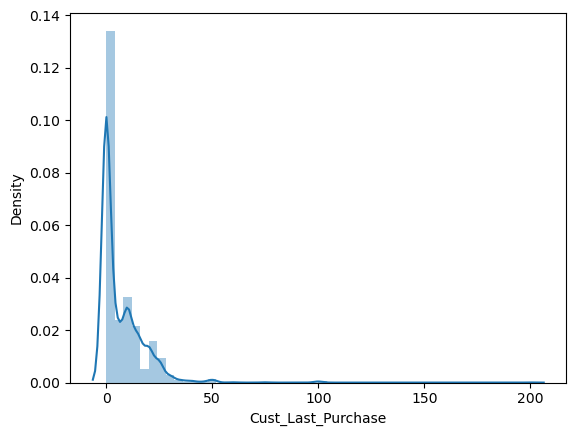

In [81]:
#Your Code Here
sns.distplot(data2['Cust_Last_Purchase'], hist = True)

In [82]:
skew = data2['Cust_Last_Purchase'].skew()
kurtosis = data['Cust_Last_Purchase'].kurtosis()
print("skewness of Cust_Last_Purchase:", skew)
print("kurtosis of Cust_Last_Purchase:", kurtosis)

skewness of Cust_Last_Purchase: 4.084033397744258
kurtosis of Cust_Last_Purchase: 51.83974250947104


In [83]:
#Your Code Here

### What's the Purchase amount pattern with regards to Gender

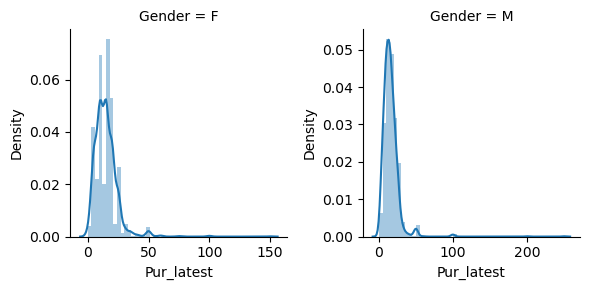

In [84]:
#Your Code Here
g = sns.FacetGrid(data2, col = "Gender", sharex = False, sharey = False)
g.map(sns.distplot, "Pur_latest")

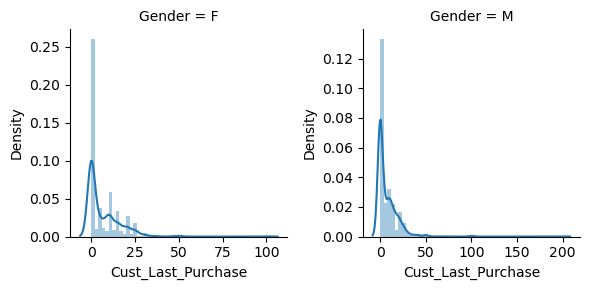

In [85]:
g = sns.FacetGrid(data2, col = "Gender", sharex = False, sharey = False)
g.map(sns.distplot, "Cust_Last_Purchase")

In [86]:
skew = data2['Pur_latest'].skew()
kurtosis = data['Pur_latest'].kurtosis()
print("skewness of Pur_latest:", skew)
print("kurtosis of Pur_latest:", kurtosis)

skewness of Pur_latest: 6.66011645195726
kurtosis of Pur_latest: 101.7561516079706


### On average, which group of gender has the higher latest purchase amount?


In [87]:
#Your Code Here
latest_purchase = data2[['Pur_latest', 'Gender']]
round(latest_purchase.groupby(['Gender']).mean(),2)

,Pur_latest
Gender,
F,14.85
M,15.79


### What is the distribution of the status of our customers


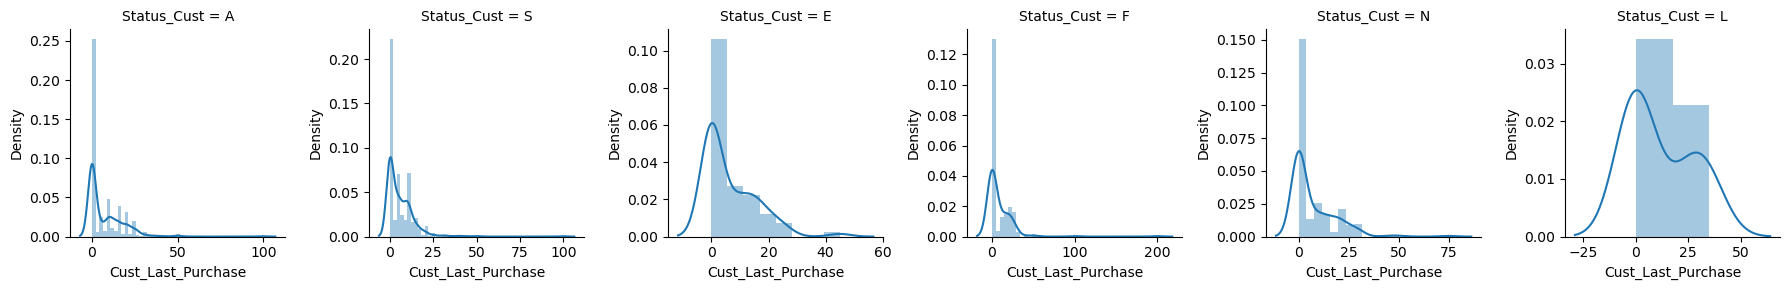

In [89]:
#Your Code Here
g = sns.FacetGrid(data2, col = "Status_Cust", sharex = False, sharey = False)
g.map(sns.distplot, "Cust_Last_Purchase")

In [90]:
skew = data2['Cust_Last_Purchase'].skew()
kurtosis = data['Cust_Last_Purchase'].kurtosis()
print("skewness of Cust_Last_Purchase:", skew)
print("kurtosis of Cust_Last_Purchase:", kurtosis)

skewness of Cust_Last_Purchase: 4.084033397744258
kurtosis of Cust_Last_Purchase: 51.83974250947104


#Your Code Here
1. Based on the customers' last purchase, we can say that the active customers purchased more compared to other status. 
2. The graph for the customer status are positively skewed.

### What is the average number of purchase made in the last 3 years among different customer status


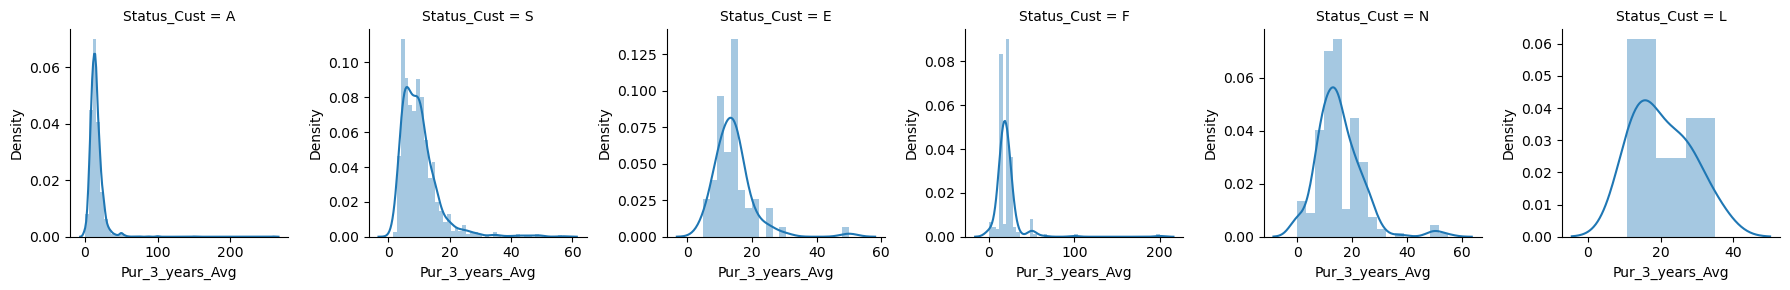

In [93]:
#Your Code Here
g = sns.FacetGrid(data2, col = "Status_Cust", sharex = False, sharey = False)
g.map(sns.distplot, "Pur_3_years_Avg")

In [94]:
skew = data2['Pur_3_years_Avg'].skew()
kurtosis = data['Pur_3_years_Avg'].kurtosis()
print("skewness of Pur_3_years_Avg:", skew)
print("kurtosis of Pur_3_years_Avg:", kurtosis)

skewness of Pur_3_years_Avg: 7.913836271288157
kurtosis of Pur_3_years_Avg: 145.5200139908152


#Your Code Here
1. Within a period of 3 years, the active customers show a high number of purchase when compared other customer status S,L,E,N and F.
2. Active customers have higher possibility of becoming potential customers. 

### What is the average number of purchase made in the last 5 years among different customer status


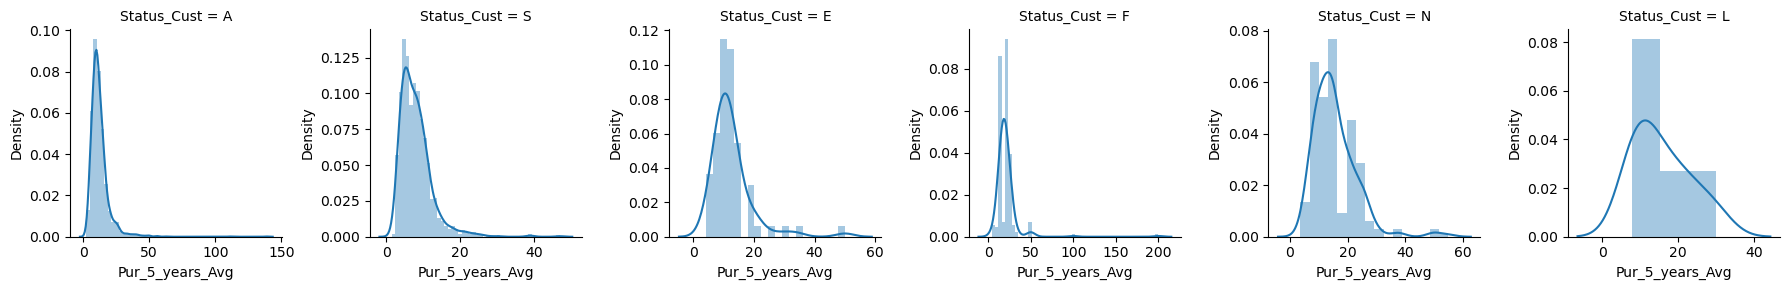

In [96]:
#Your Code Here
g = sns.FacetGrid(data2, col = "Status_Cust", sharex = False, sharey = False)
g.map(sns.distplot, "Pur_5_years_Avg")

In [97]:
skew = data2['Pur_5_years_Avg'].skew()
kurtosis = data['Pur_5_years_Avg'].kurtosis()
print("skewness of Pur_5_years_Avg:", skew)
print("kurtosis of Pur_5_years_Avg:", kurtosis)

skewness of Pur_5_years_Avg: 6.7565794816193225
kurtosis of Pur_5_years_Avg: 112.63365682959795


#Your Code Here
1. On average, the active customers show a high number of purchase when compared other customer status S,L,E,N and F.
2. We can conclude that the active customers are more than likely to repurchase and become our potential customers. 

### What is the distribution of the inactive number of months since last purchase?


<AxesSubplot: xlabel='InAct_Last', ylabel='Density'>

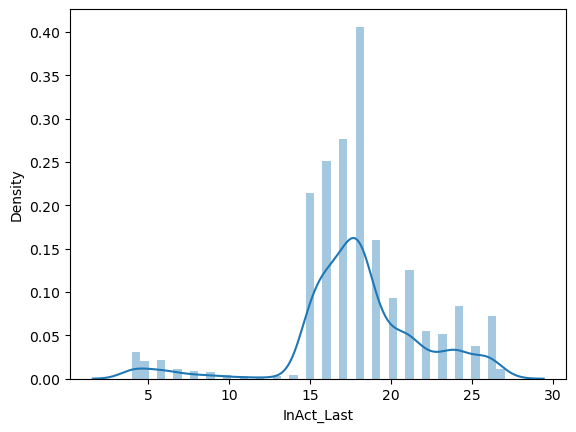

In [99]:
#Your Code Here
sns.distplot(data2['InAct_Last'], hist = True)

In [100]:
skew = data2['InAct_Last'].skew()
kurtosis = data['InAct_Last'].kurtosis()
print("skewness of InAct_Last:", skew)
print("kurtosis of InAct_Last:", kurtosis)

skewness of InAct_Last: -0.808273501361896
kurtosis of InAct_Last: 2.5061728980686384


### What is the average number of purchase made in the last 3 years among different gender


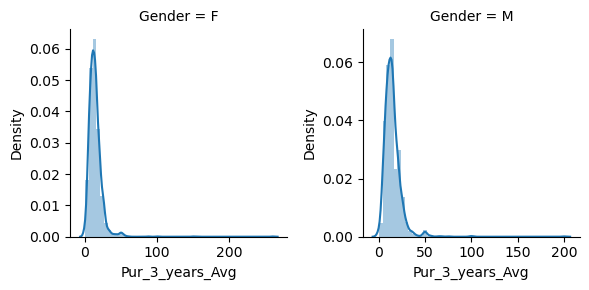

In [101]:
#Your Code Here
g = sns.FacetGrid(data2, col = "Gender", sharex = False, sharey = False)
g.map(sns.distplot, "Pur_3_years_Avg")

In [102]:
skew = data2['Pur_3_years_Avg'].skew()
kurtosis = data['Pur_3_years_Avg'].kurtosis()
print("skewness of Pur_3_years_Avg:", skew)
print("kurtosis of Pur_3_years_Avg:", kurtosis)

skewness of Pur_3_years_Avg: 7.913836271288157
kurtosis of Pur_3_years_Avg: 145.5200139908152


In [103]:
latest_purchase = data2[['Pur_3_years_Avg', 'Gender']]
round(latest_purchase.groupby(['Gender']).mean(),2)

,Pur_3_years_Avg
Gender,
F,14.03
M,14.66


### Check the distribution of customers who responded to ads in past 5 years with By Gender

#### Plot By gender

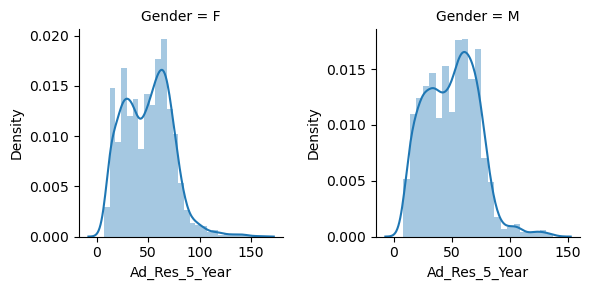

In [104]:
#Your Code Here
g = sns.FacetGrid(data2, col = "Gender", sharex = False, sharey = False)
g.map(sns.distplot, "Ad_Res_5_Year")

In [105]:
skew = data2['Ad_Res_5_Year'].skew()
kurtosis = data['Ad_Res_5_Year'].kurtosis()
print("skewness of Ad_Res_5_Year:", skew)
print("kurtosis of Ad_Res_5_Year:", kurtosis)

skewness of Ad_Res_5_Year: 0.401333480771447
kurtosis of Ad_Res_5_Year: 0.23560739297598365


#### Plot By Customer Status

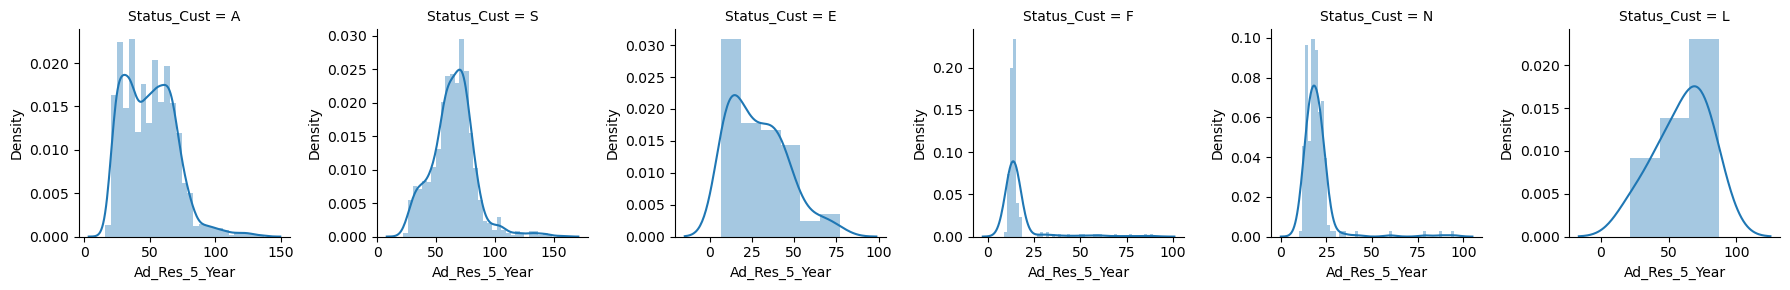

In [106]:
#Your Code Here
g = sns.FacetGrid(data2, col = "Status_Cust", sharex = False, sharey = False)
g.map(sns.distplot, "Ad_Res_5_Year")

In [107]:
skew = data2['Ad_Res_5_Year'].skew()
kurtosis = data['Ad_Res_5_Year'].kurtosis()
print("skewness of Ad_Res_5_Year:", skew)
print("kurtosis of Ad_Res_5_Year:", kurtosis)

skewness of Ad_Res_5_Year: 0.401333480771447
kurtosis of Ad_Res_5_Year: 0.23560739297598365


#### Plot By House Ownership

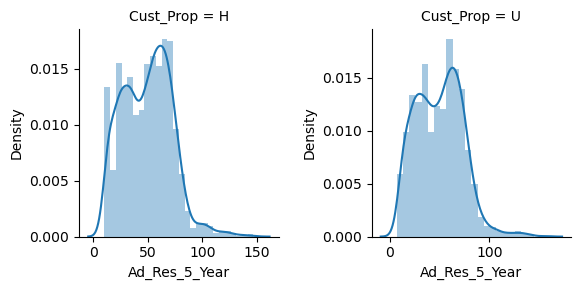

In [108]:
#Your Code Here
g = sns.FacetGrid(data2, col = "Cust_Prop", sharex = False, sharey = False)
g.map(sns.distplot, "Ad_Res_5_Year")

#### Summarize your findings - what have you learned from your insights?

In conclusion, females are more likely to purchase than males. Active and star buyers contribute equally to the business, while customers with an annual income of 50,000 purchase more goods than the rest of the group.
As a result, lapsed customers are most likely not from the potential buyer group, which means they are neither active nor stars, nor do they earn 50,000 per year.

Advertisement should be minimised because it did not attract potential customers in the business; instead, more funds should be allocated to improving or launching new products, or special advertising (including promotional discounts) to our potential buyers.

# <font color=green>Feature Enginearing<font>
    
### We have too many Features? Do you think you can make some high level features? 

For example: Instead of three variables for number of ads responded by customer? why not create a single variable which shows ads responded in last three years

In [174]:
#Your Code Here
data2 = data2.assign(Total_purchase = data2.Pur_3_years + data2.Pur_5_years + data2.Pur_3_years_Indirect + data2.Pur_5_years_Indirect)
data2

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,...,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income,Total_purchase
0,1,9946,5.0,2,17,2,4,0.0,7.50,7.76,...,3,12,16,A,0,71.0,F,H,65957.0,25
1,1,87939,30.0,1,7,0,3,25.0,25.00,13.00,...,6,6,22,A,1,7.0,M,U,44284.5,11
2,0,88003,0.0,5,12,3,5,15.0,15.00,11.25,...,6,17,22,S,1,79.0,F,U,44284.5,25
3,1,188721,20.0,1,11,0,3,20.0,20.00,12.45,...,8,8,33,A,0,73.0,F,U,76293.0,15
4,1,88056,5.0,3,15,2,7,3.0,4.33,3.80,...,6,12,24,S,1,68.0,F,H,113663.0,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3613,1,87771,20.0,2,6,0,1,20.0,16.50,13.33,...,6,6,17,A,0,33.0,F,H,83754.0,9
3614,0,90077,0.0,7,31,4,21,13.0,12.71,10.94,...,6,17,35,S,1,81.0,F,H,83754.0,63
3615,0,94040,0.0,7,13,6,8,3.0,12.43,10.62,...,7,18,24,A,1,39.0,M,U,44284.5,34
3616,0,87871,0.0,1,11,1,7,20.0,20.00,16.55,...,6,15,25,A,1,76.0,M,H,71618.0,20


In [175]:
data2['Gender'].value_counts()

F    2005
M    1613
Name: Gender, dtype: int64

In [176]:
#Your Code Here
data2

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,...,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income,Total_purchase
0,1,9946,5.0,2,17,2,4,0.0,7.50,7.76,...,3,12,16,A,0,71.0,F,H,65957.0,25
1,1,87939,30.0,1,7,0,3,25.0,25.00,13.00,...,6,6,22,A,1,7.0,M,U,44284.5,11
2,0,88003,0.0,5,12,3,5,15.0,15.00,11.25,...,6,17,22,S,1,79.0,F,U,44284.5,25
3,1,188721,20.0,1,11,0,3,20.0,20.00,12.45,...,8,8,33,A,0,73.0,F,U,76293.0,15
4,1,88056,5.0,3,15,2,7,3.0,4.33,3.80,...,6,12,24,S,1,68.0,F,H,113663.0,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3613,1,87771,20.0,2,6,0,1,20.0,16.50,13.33,...,6,6,17,A,0,33.0,F,H,83754.0,9
3614,0,90077,0.0,7,31,4,21,13.0,12.71,10.94,...,6,17,35,S,1,81.0,F,H,83754.0,63
3615,0,94040,0.0,7,13,6,8,3.0,12.43,10.62,...,7,18,24,A,1,39.0,M,U,44284.5,34
3616,0,87871,0.0,1,11,1,7,20.0,20.00,16.55,...,6,15,25,A,1,76.0,M,H,71618.0,20


In [177]:
#Your Code Here
data3 = data2.copy()
data3 = data3.assign(Total_Ad_Res = data3.Ad_Res_Ind_1_Year + data3.Ad_Res_Ind_3_Year + data3.Ad_Res_Ind_5_Year + data3.Ad_Res_1_year + data3.Ad_Res_3_Year + data3.Ad_Res_5_Year)

In [178]:
data3

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,...,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income,Total_purchase,Total_Ad_Res
0,1,9946,5.0,2,17,2,4,0.0,7.50,7.76,...,12,16,A,0,71.0,F,H,65957.0,25,184
1,1,87939,30.0,1,7,0,3,25.0,25.00,13.00,...,6,22,A,1,7.0,M,U,44284.5,11,137
2,0,88003,0.0,5,12,3,5,15.0,15.00,11.25,...,17,22,S,1,79.0,F,U,44284.5,25,147
3,1,188721,20.0,1,11,0,3,20.0,20.00,12.45,...,8,33,A,0,73.0,F,U,76293.0,15,175
4,1,88056,5.0,3,15,2,7,3.0,4.33,3.80,...,12,24,S,1,68.0,F,H,113663.0,27,146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3613,1,87771,20.0,2,6,0,1,20.0,16.50,13.33,...,6,17,A,0,33.0,F,H,83754.0,9,123
3614,0,90077,0.0,7,31,4,21,13.0,12.71,10.94,...,17,35,S,1,81.0,F,H,83754.0,63,191
3615,0,94040,0.0,7,13,6,8,3.0,12.43,10.62,...,18,24,A,1,39.0,M,U,44284.5,34,158
3616,0,87871,0.0,1,11,1,7,20.0,20.00,16.55,...,15,25,A,1,76.0,M,H,71618.0,20,149


In [179]:
data3.drop("Pur_3_years", axis=1, inplace=True)
data3.drop("Pur_5_years", axis=1, inplace=True)
data3.drop("Pur_3_years_Indirect", axis=1, inplace=True)
data3.drop("Pur_5_years_Indirect", axis=1, inplace=True)
data3.drop("Ad_Res_Ind_1_Year", axis=1, inplace=True)
data3.drop("Ad_Res_Ind_3_Year", axis=1, inplace=True)
data3.drop("Ad_Res_Ind_5_Year", axis=1, inplace=True)
data3.drop("Ad_Res_1_year", axis=1, inplace=True)
data3.drop("Ad_Res_3_Year", axis=1, inplace=True)
data3.drop("Ad_Res_5_Year", axis=1, inplace=True)
data3.drop("C_ID", axis=1, inplace=True)

In [180]:
data3.dtypes

Potential_Customer            int64
Cust_Last_Purchase          float64
Pur_latest                  float64
Pur_3_years_Avg             float64
Pur_5_years_Avg             float64
Pur_3_years_Avg_Indirect     object
InAct_Last                    int64
InAct_First                   int64
Status_Cust                  object
Status_Latest_Ad              int64
Age                         float64
Gender                       object
Cust_Prop                    object
Cust_Ann_Income             float64
Total_purchase                int64
Total_Ad_Res                  int64
dtype: object

In [181]:
data3.to_csv("data_new.csv")

In [182]:
new_data = pd.read_csv('../Capstone/data_new.csv' , index_col = 'Unnamed: 0')

In [183]:
new_data

,Potential_Customer,Cust_Last_Purchase,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,InAct_First,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income,Total_purchase,Total_Ad_Res
0,1,5.0,0.0,7.50,7.76,$7.50,14,110,A,0,71.0,F,H,65957.0,25,184
1,1,30.0,25.0,25.00,13.00,0.0,18,75,A,1,7.0,M,U,44284.5,11,137
2,0,0.0,15.0,15.00,11.25,$14.67,19,57,S,1,79.0,F,U,44284.5,25,147
3,1,20.0,20.0,20.00,12.45,0.0,5,113,A,0,73.0,F,U,76293.0,15,175
4,1,5.0,3.0,4.33,3.80,$4.00,17,118,S,1,68.0,F,H,113663.0,27,146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3613,1,20.0,20.0,16.50,13.33,0.0,19,57,A,0,33.0,F,H,83754.0,9,123
3614,0,0.0,13.0,12.71,10.94,$13.25,17,128,S,1,81.0,F,H,83754.0,63,191
3615,0,0.0,3.0,12.43,10.62,$12.50,4,80,A,1,39.0,M,U,44284.5,34,158
3616,0,0.0,20.0,20.00,16.55,$20.00,24,93,A,1,76.0,M,H,71618.0,20,149


In [184]:
new_data.dtypes

Potential_Customer            int64
Cust_Last_Purchase          float64
Pur_latest                  float64
Pur_3_years_Avg             float64
Pur_5_years_Avg             float64
Pur_3_years_Avg_Indirect     object
InAct_Last                    int64
InAct_First                   int64
Status_Cust                  object
Status_Latest_Ad              int64
Age                         float64
Gender                       object
Cust_Prop                    object
Cust_Ann_Income             float64
Total_purchase                int64
Total_Ad_Res                  int64
dtype: object

# <font color=green>Feature Selection<font>

### Check the correlation among the variables

In [185]:
#Your Code Here
new_data.corr()

,Potential_Customer,Cust_Last_Purchase,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,InAct_Last,InAct_First,Status_Latest_Ad,Age,Cust_Ann_Income,Total_purchase,Total_Ad_Res
Potential_Customer,1.000000,0.672247,-0.101008,-0.103504,-0.111500,-0.103023,0.070813,0.110590,0.020047,-0.006616,0.118886,0.088948
Cust_Last_Purchase,0.672247,1.000000,0.359298,0.272666,0.229410,-0.011641,-0.020234,-0.041069,0.019381,0.043622,-0.059283,0.025456
Pur_latest,-0.101008,0.359298,1.000000,0.786184,0.747429,0.132908,-0.142707,-0.273792,-0.005242,0.097159,-0.305845,-0.094503
Pur_3_years_Avg,-0.103504,0.272666,0.786184,1.000000,0.881783,0.091458,-0.121262,-0.265267,-0.013291,0.083329,-0.296583,-0.053373
Pur_5_years_Avg,-0.111500,0.229410,0.747429,0.881783,1.000000,0.082255,-0.297026,-0.360026,-0.040435,0.098418,-0.382126,-0.191849
InAct_Last,-0.103023,-0.011641,0.132908,0.091458,0.082255,1.000000,-0.082802,-0.147530,0.001831,0.027797,-0.234557,-0.309902
InAct_First,0.070813,-0.020234,-0.142707,-0.121262,-0.297026,-0.082802,1.000000,0.524103,0.173254,-0.059468,0.670334,0.749358
Status_Latest_Ad,0.110590,-0.041069,-0.273792,-0.265267,-0.360026,-0.147530,0.524103,1.000000,0.102927,-0.070713,0.629121,0.530598
Age,0.020047,0.019381,-0.005242,-0.013291,-0.040435,0.001831,0.173254,0.102927,1.000000,0.064033,0.101253,0.157042
Cust_Ann_Income,-0.006616,0.043622,0.097159,0.083329,0.098418,0.027797,-0.059468,-0.070713,0.064033,1.000000,-0.067470,-0.021703


In [121]:
#Your Code Here

### Create a Heatmap of correlation between the variables

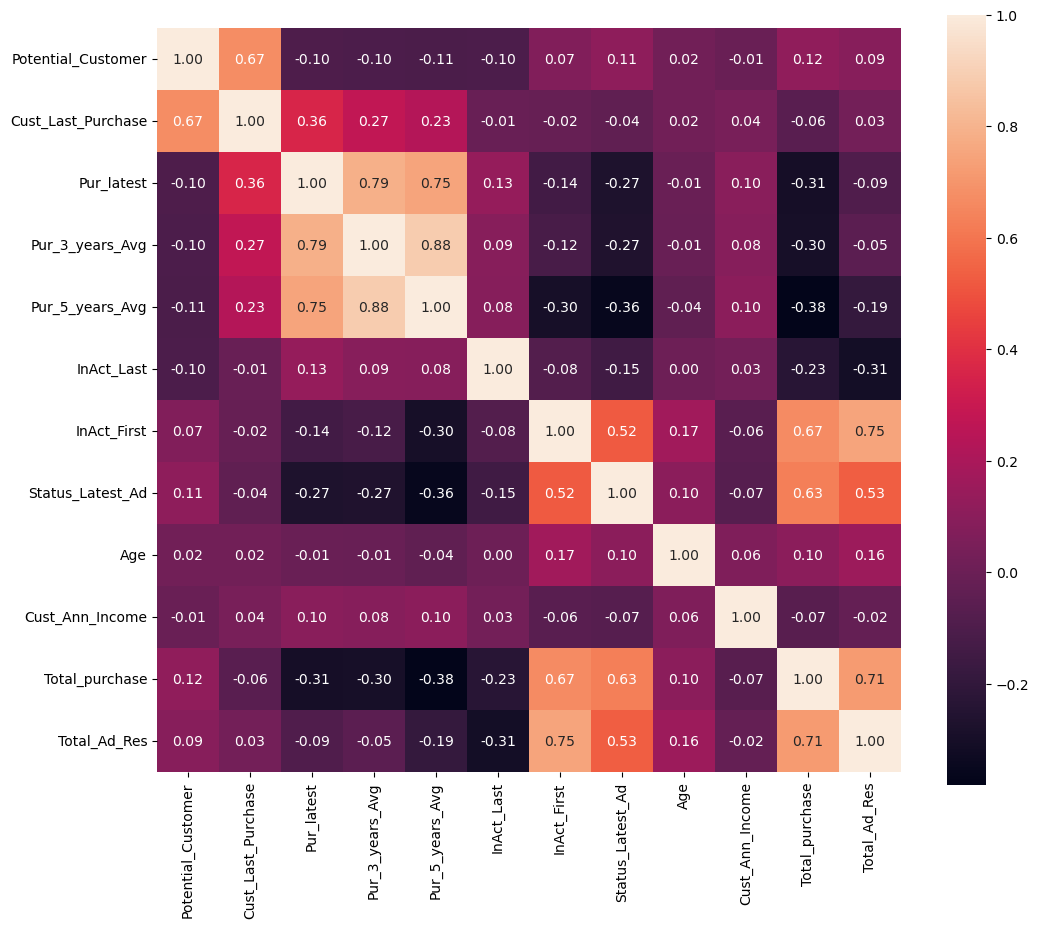

In [186]:
#Your Code Here
plt.subplots(figsize=(12,10))
sns.heatmap(new_data.corr(), annot= True, fmt='0.2f', square = True);

In [187]:
#Your Code Here
new_data1=new_data.copy()

In [188]:
new_data1.drop(new_data1.columns.difference(['Total_purchase','Total_Ad_Res']), 1, inplace=True)

In [189]:
new_data1.corr().style.background_gradient(cmap='coolwarm')

,Total_purchase,Total_Ad_Res
Total_purchase,1.000000,0.714887
Total_Ad_Res,0.714887,1.000000


### Summarize your findings - what have you learned from your insights?

1. The customers that responds to the ads and ended up purchasing is 0.714887 out of 1.000000

### Find the Numerical Summary statistics for the variables such as mean, median, mode

In [190]:
# Take some time to understand these numbers
new_data.describe(include = 'all')

,Potential_Customer,Cust_Last_Purchase,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,InAct_First,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income,Total_purchase,Total_Ad_Res
count,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618,3618.000000,3618.000000,3618,3618.000000,3618.000000,3618,3618,3618.000000,3618.000000,3618.000000
unique,NaN,NaN,NaN,NaN,NaN,264,NaN,NaN,6,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,A,NaN,NaN,F,H,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,662,NaN,NaN,2146,NaN,NaN,2005,1981,NaN,NaN,NaN
mean,0.479823,6.985144,15.267344,14.309536,11.913532,NaN,17.934218,73.807352,NaN,0.568546,46.082919,NaN,NaN,50519.650636,22.124102,129.220840
std,0.499662,10.820356,10.794970,10.060256,8.046675,NaN,4.145219,38.127214,NaN,0.495348,28.623074,NaN,NaN,16007.107051,16.357420,43.343414
min,0.000000,0.000000,0.000000,0.000000,1.500000,NaN,4.000000,15.000000,NaN,0.000000,0.000000,NaN,NaN,16564.000000,1.000000,25.000000
25%,0.000000,0.000000,10.000000,9.000000,7.500000,NaN,16.000000,40.000000,NaN,0.000000,28.250000,NaN,NaN,42274.500000,10.000000,99.000000
50%,0.000000,0.000000,15.000000,13.000000,10.295000,NaN,18.000000,74.000000,NaN,1.000000,52.000000,NaN,NaN,44285.750000,19.000000,131.000000
75%,1.000000,11.000000,20.000000,17.500000,14.787500,NaN,20.000000,111.000000,NaN,1.000000,70.000000,NaN,NaN,56508.000000,30.000000,157.000000


In [126]:
from scipy.stats import iqr

In [127]:
new_data.dtypes

Potential_Customer            int64
Cust_Last_Purchase          float64
Pur_latest                  float64
Pur_3_years_Avg             float64
Pur_5_years_Avg             float64
Pur_3_years_Avg_Indirect     object
InAct_Last                    int64
InAct_First                   int64
Status_Cust                  object
Status_Latest_Ad              int64
Age                         float64
Gender                       object
Cust_Prop                    object
Cust_Ann_Income             float64
Total_Ad_Res                  int64
dtype: object

### Check for outliers by either plotting box plots or IQR For all numerical variables

<AxesSubplot: >

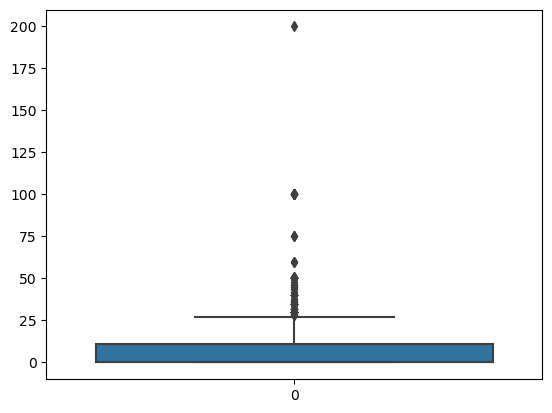

In [128]:
#Your Code Here
#new_data.loc[new_data.Cust_Last_Purchase < 30000].Cust_Last_Purchase

sns.boxplot(new_data.loc[new_data.Cust_Last_Purchase < 30000].Cust_Last_Purchase)

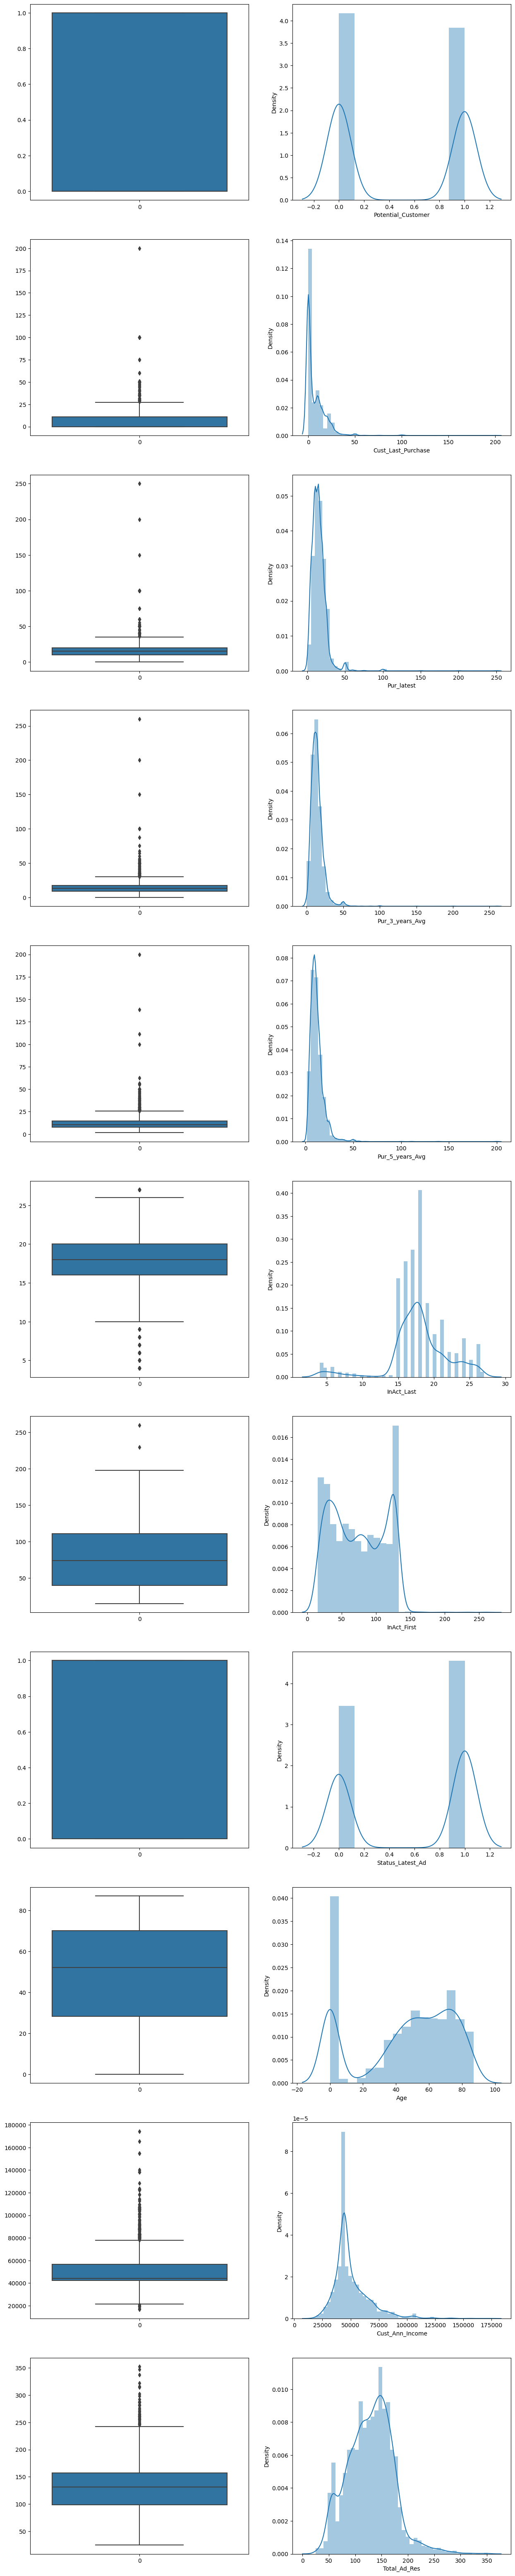

In [129]:
numeric_data = new_data.columns[new_data.dtypes != 'object']
fig, ax=plt.subplots(nrows=len(numeric_data), ncols=2, figsize=(15,80))
     
for num_att in range(len(numeric_data)):
    sns.boxplot(new_data[numeric_data[num_att]], ax=ax[num_att, 0])
    sns.distplot(new_data[numeric_data[num_att]], ax=ax[num_att, 1])

In [130]:
numeric_data

Index(['Potential_Customer', 'Cust_Last_Purchase', 'Pur_latest',
       'Pur_3_years_Avg', 'Pur_5_years_Avg', 'InAct_Last', 'InAct_First',
       'Status_Latest_Ad', 'Age', 'Cust_Ann_Income', 'Total_Ad_Res'],
      dtype='object')

<AxesSubplot: >

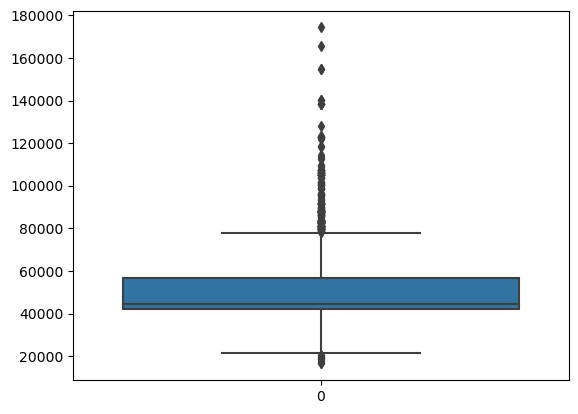

In [131]:
#Your Code Here
sns.boxplot(new_data.loc[new_data.Cust_Ann_Income < 1000000].Cust_Ann_Income)

<AxesSubplot: >

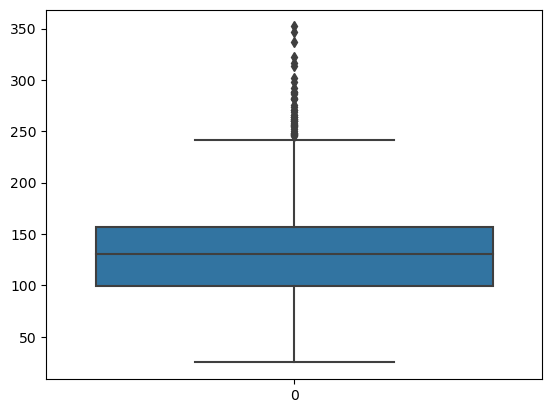

In [132]:
sns.boxplot(new_data.loc[new_data.Total_Ad_Res < 300000].Total_Ad_Res)

### Pandas to SQL

#### Load the data into a Sql database, customers
Hint: Create database with name Customers
Use pandas to connect and load the dataframe to DATABASE

In [133]:
%load_ext sql
%sql sqlite:///Customers.db

In [134]:
import sqlite3

conn = sqlite3.connect('Customers.db')

In [135]:
data.to_sql('customers',conn)

3618

In [136]:
Cust=pd.read_csv('data_new.csv', index_col= 'Unnamed: 0')
Cust.to_sql('Customers1',conn)
res = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in res:
    print(name[0])
#Your Code Here

customers
Customers1


In [137]:
#Your Code Here
query = pd.read_sql_query('SELECT * FROM Customers1 LIMIT 5',conn)
query

,index,Potential_Customer,Cust_Last_Purchase,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,InAct_First,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income,Total_Ad_Res
0,0,1,5.0,0.0,7.50,7.76,$7.50,14,110,A,0,71.0,F,H,65957.0,184
1,1,1,30.0,25.0,25.00,13.00,0.0,18,75,A,1,7.0,M,U,44284.5,137
2,2,0,0.0,15.0,15.00,11.25,$14.67,19,57,S,1,79.0,F,U,44284.5,147
3,3,1,20.0,20.0,20.00,12.45,0.0,5,113,A,0,73.0,F,U,76293.0,175
4,4,1,5.0,3.0,4.33,3.80,$4.00,17,118,S,1,68.0,F,H,113663.0,146


### Once you have created a database, use either SQL or Python to query the data and solve these questions

### Write a query that returns:

#### a) What percentage of female customers own a house? 

In [138]:
#Your Code Here
Female = pd.read_sql_query('SELECT Count(*) FROM Customers1 WHERE Gender="F" and Cust_Prop = "H" ', conn)
All = pd.read_sql_query('SELECT Count(*) FROM Customers1 WHERE Gender="F"', conn)

In [139]:
#All = pd.read_sql_query('SELECT Count(*) FROM Customers2 WHERE Gender = "F"',conn)

In [140]:
#Your Code Here
print((Female*100/All))

    Count(*)
0  51.970075


#### b) How much is the average salary of these customers?

In [141]:
#Your Code Here
query = pd.read_sql_query('SELECT ROUND(AVG(Cust_Ann_Income),2) as [Average Salary] FROM Customers1', conn)
query

,Average Salary
0,50519.65


In [142]:
#Your Code Here

### Write a query that returns:

#### a) What percentage of purchases are made through external links (indirect buys)?


In [211]:
#Your Code Here
c = conn.cursor()
c.execute('''select (select count(*) from customers where Pur_3_years_Avg_Indirect > 0) * 100 / count(*)
from customers
''')

for row in c.fetchall():
    print(row)
    
#failed to do

(0,)


In [144]:
#Your Code Here

#### b) How many purchases have been made by new buyers through external links?

In [145]:
Purchase = pd.read_sql_query('SELECT Count(Pur_3_years_Avg_Indirect) AS "Total Purchases for New Buyers" FROM Customers1 WHERE Status_Cust="N"', conn)
Purchase

,Total Purchases for New Buyers
0,207


In [146]:
#Your Code Here

### Write a query that calculate:

#### The average amount of purchases that have been made by Star Buyers?

In [147]:
#Your Code Here
#Your Code Here
avg_pur = pd.read_sql_query('SELECT ROUND(AVG(Pur_latest),2) as [Average Purchases] FROM Customers1 WHERE Status_Cust="S"', conn)
avg_pur

,Average Purchases
0,10.53


In [148]:
#Your Code Here